# 1st level. Costa Rican Household Poverty Level Prediction

**Multi-class classification : Tabular data**      

The training set has one additional column, `Target`, which `represents the poverty level on a 1-4 scale` and is the label for the competition. A value of `1` is the most extreme poverty.
    
This is a **supervised multi-class classification** machine learning problem:
    
**Supervised**: provided with the labels for the training data  
**Multi-class classification**: Labels are discrete values with 4 classes    

Important note: while all members of a household should have the same label in the training data, there are errors where individuals in the same household have different labels. In these cases, we are told to use the label for the head of each household, which can be identified by the rows where `parentesco1 == 1.0`.

---    

##  Target
- 1 = extreme poverty 
- 2 = moderate poverty 
- 3 = vulnerable households 
- 4 = non vulnerable households

---
## Columns  
+ `Id`: a unique identifier for each individual, this should not be a feature that we use!
+ `idhogar`: a unique identifier for each household. This variable is not a feature, but will be used to group individuals by household as all individuals in a household will have the same identifier.
+ `parentesco1`: indicates if this person is the head of the household.
+ `Target`: the label, which should be equal for all members in a household


  
개인 중 일부는 가장이없는 가구에 속해 있습니다. 즉, 안타깝게도이 데이터를 교육에 사용할 수 없습니다. 

## 평가지표 :  Macro F1 Score

![](https://lh3.googleusercontent.com/proxy/35-ScDSzYTVwmutuHHcR6QfVYkGUACSrduSNtvotRz0N_J60703374OpHYoF6aZIPGZn01Vp_fB7vgkfn-H_YrKjRSN7WkeTlA4H7nRhI-ovFy_K0xzmklUB)


**Macro F1 Score =(F1 Class 1+F1 Class 2+F1 Class 3+F1 Class 4)/4**

  

다중 클래스 문제의 경우 각 클래스의 F1 점수를 평균화해야합니다. 매크로 F1 점수는 레이블 불균형을 고려하지 않고 각 클래스의 F1 점수를 평균합니다.  
즉, 매크로를 사용할 때 ( "가중"점수를 사용할 때와 같이) 각 레이블의 발생 횟수가 계산에 반영되지 않습니다.

```python
from sklearn.metrics import f1_score
f1_score(y_true, y_predicted, average = 'macro`)
         ```

# Exploratory Data Analysis (EDA)

EDA의 경우 기능 엔지니어링 및 모델링에 사용할 수있는 흥미로운 이상, 추세, 상관 관계 또는 패턴을 검토합니다. 

우리는 데이터를 양적 (통계 포함)과 시각적 (수치 포함) 모두 조사 할 것입니다.  

## Import

In [93]:
# 데이터 조작
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 default 조정
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18 #rcParams 설정을 활용하면, 차트의 크기와 선의 색, 두께등의 기본 값을 설정
plt.rcParams['patch.edgecolor'] = 'k'

## Data Loading and Summary

In [94]:
pd.options.display.max_columns = 150

# 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   
2     0     0     0     0     1     1     0     1     1       1       1   
3     0     2     2     1     1     2     1     3     4       4       4   
4     0     2     2     1     1     2     1     3     4       4       4   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   
2        11      NaN       1            0            0          0         0   
3         9      1.0       4            1            0          0         0   
4        11      NaN       4            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   
2         1          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


130 개의 int 칼럼, 8 개의 float 칼럼, 5 개의 object 칼럼이 있다.   
정수 열은 아마도 부울 변수 (0 또는 1을 취함) 또는 이산 순서 값이있는 순서 변수!  
객체 열은 기계 학습 모델에 직접 공급할 수 없기 때문에 문제가 될 수 있습니다.

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


## integer colums(129+Target)

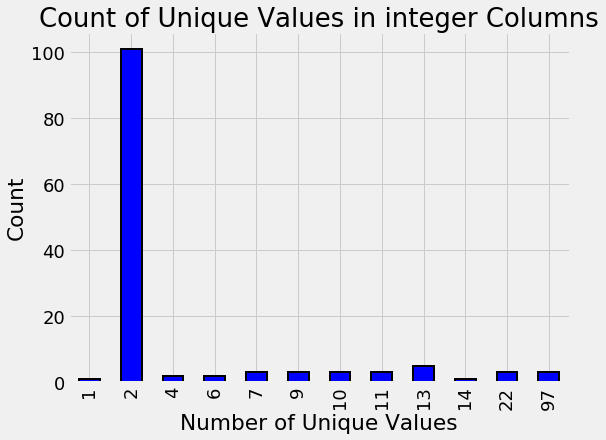

In [97]:
# df.nunique() :return the number of unique elements in the object(각 int칼럼 별 구성 원소의 값 종류를 체크)
# df.sort_index() : 정렬(기본은 오름차순, ascending = False이면 내림차순 설정됨)

train.select_dtypes(np.int64).nunique()
train.select_dtypes(np.int64).nunique().value_counts().sort_index()
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2);

plt.xlabel('Number of Unique Values') ;
plt.ylabel('Count');
plt.title('Count of Unique Values in integer Columns');

고유 한 값이 2 개 뿐인 칼럼은 boolean(0 또는 1)을 나타냄!   
정말 많은 100개 이상의 칼럼이 0,1인 값인 값 2개로 구성된 칼럼이다!!  
예를 들어, 냉장 칼럼은 가정에 냉장고가 있는지 여부를 나타냅니다.   
가구 수준에있는 boolean 열에서 기능을 만들 때가되면 이를 집계 할 필요가 없습니다. 그러나 개별 수준에있는 부울 열은 집계되어야합니다.

## Float Columns(8개..)


`OrderedDict`를 사용하여 빈곤 수준을 색상에 매핑 할 것입니다. 

---

**`enumerate`**  
  
- 반복문 사용 시 몇 번째 반복문인지 확인이 필요할 수 있습니다. 이때 사용합니다.
- 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환합니다.

In [98]:
t = [1, 5, 7, 33, 39, 52]
for p in enumerate(t):
     print(p)

(0, 1)
(1, 5)
(2, 7)
(3, 33)
(4, 39)
(5, 52)


In [99]:
# for 과 in 사이에 변수가 2개 들어있는게 가능!
for i, v in enumerate(t):
    print("index : {}, value: {}".format(i,v)) 

index : 0, value: 1
index : 1, value: 5
index : 2, value: 7
index : 3, value: 33
index : 4, value: 39
index : 5, value: 52


---
**`OrderedDict`클래스**  
`collections` 모듈의 `OrderedDict` 클래스를 사용하면 **데이터의 순서를 보장**받을 수 있었습니다.  
  
파이썬 3.6 이전에서는 `Dictionary`에 데이터를 삽입된 순서대로 데이터를 획득할 수가 없었습니다.   
따라서 무작위 순서로 데이터를 얻게 되는 일이 빈번했었는데요.  

In [100]:
# 내 주피터노트북의 내장 파이썬 버전은 3.7.6
import sys

print('-sys.version—')
print(sys.version)

-sys.version—
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


0 v2a1
1 v18q1


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

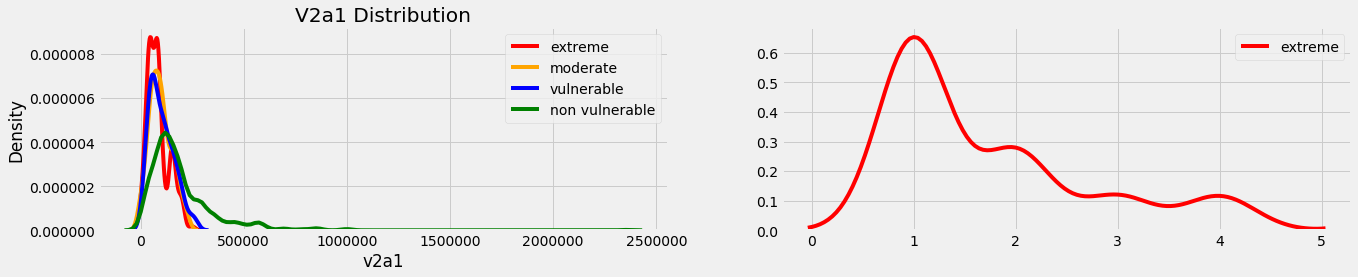

In [101]:
#가구 빈곤 수준에 따라 변수 분포에 유의 한 차이가 있는지 확인
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping _ Target(1~4)수준에 각각 색을 부여
colors = dict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = dict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# float열 반복!!
for i, col in enumerate(train.select_dtypes('float64')):
    print(i,col)
    ax = plt.subplot(4, 2, i + 1)
    # target 수준 별 반복
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots

In [ ]:
#가구 빈곤 수준에 따라 변수 분포에 유의 한 차이가 있는지 확인
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping _ Target(1~4)수준에 각각 색을 부여
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# float열 반복!!
for i, col in enumerate(train.select_dtypes('float64')):
    print(i,col)
    ax = plt.subplot(4, 2, i + 1)
    # target 수준 별 반복
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots

In [ ]:
train.select_dtypes('float64')

그러나 이러한 플롯은 이미 어떤 변수가 모델에 가장 "관련성이"있는지 파악할 수 있습니다. 예를 들어, 가정에서 성인의 평균 교육을 나타내는 meaneduc는 빈곤 수준과 관련이있는 것으로 보입니다. 평균 성인 교육이 높을수록 빈곤 수준이 덜 심각한 목표 값이 높아집니다. 교육의 중요성의 주제는이 노트에서 몇 번이고 다시 돌아올 것입니다!

## Object Columns

In [ ]:
train.select_dtypes('object').head()

`Id` 및 `idhogar` 개체 유형은 `식별 변수`이기 때문에 의미가 있습니다.   
그러나 다른 열은 기계 학습을 수행하기 전에 처리해야하는 문자열과 숫자가 혼합 된 것 같습니다. 이 열에 대한 문서에 따르면 :
  
- `dependency` : 부양 률, 계산 = (19 세 미만 또는 64 세 이상 가구 구성원 수) / (19 세에서 64 세 사이 가구 구성원 수)
- `edjefe` : escolari (교육 연도), 세대주 및 성별의 상호 작용에 기반한 남성 가구주의 교육 연수, yes = 1 및 no = 0
- `edjefa` : escolari (교육 연도), 세대주 및 성별의 상호 작용을 기반으로 한 여성 가구주의 교육 연수, yes = 1 및 no = 0

이러한 설명으로 문제가 해결됩니다.   
이 세 변수의 경우 "yes"= 1 및 "no"= 0입니다. 매핑을 사용하여 변수를 수정하고 float으로 변환 할 수 있습니다.

In [ ]:
mapping = {"yes": 1, "no": 0}

# train 과 test에 둘다 적용
for df in [train, test]:
    # mapping 을 적용해 값을 1,0으로 바꾸기
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

In [ ]:
plt.figure(figsize = (16, 12))

# 위의 바꾼 3개의 칼럼 반복
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    # povety_level로 반복
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); 
    plt.xlabel(f'{col}'); 
    plt.ylabel('Density');

plt.subplots_adjust(top = 2)

이러한 변수는 이제 숫자로 올바르게 표시되며 기계 학습 모델에 제공 될 수 있습니다.  

위와 같은 작업을 좀 더 쉽게 만들기 위해 **`train 과 test 데이터 프레임을 결합`** 할 것입니다.    
이는 기능 엔지니어링을 시작하면 두 데이터 프레임에 동일한 작업을 적용하여 동일한 기능으로 끝나기 때문에 중요합니다.   
나중에 `Target`에 따라 세트를 분리 할 수 ​​있습니다.

In [ ]:
# null로 Target column 채우기 in test 데이터
test['Target'] = np.nan
data = train.append(test, ignore_index = True)

#ignore_index=True 를 설정해주지 않으면 아래처럼 'TypeError' 가 발생할 수도,,,

In [ ]:
data

## Exploring Label Distribution

네 가지 가능한 정수 수준이 있으며 이는 네 가지 빈곤 수준을 나타냅니다.   
올바른 레이블을보기 위해 `parentesco1 == 1` 인 칼럼만 하위 집합으로 만듭니다.   
이는 각 가구에 대한 올바른 레이블 인 세대주이기 때문입니다.

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

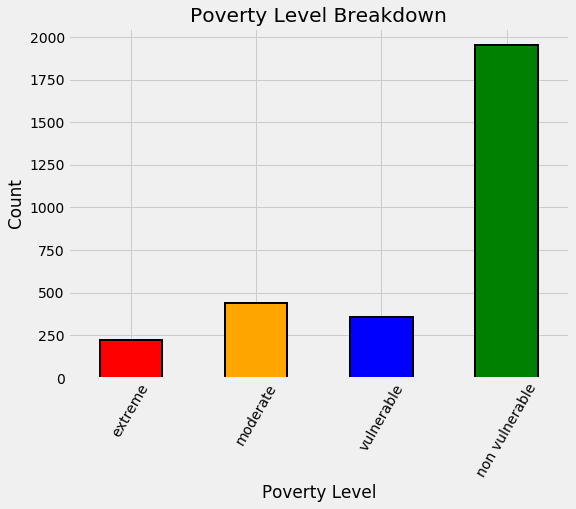

In [102]:
# 각 가구의 우두머리
heads = data.loc[data['parentesco1'] == 1].copy()

# Labels for training(트레인 데이터의 실질 TARGET 뽑기)
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target(트레인 데이터의 TARGET 의 상태체크)
label_counts = train_labels['Target'].value_counts().sort_index()

# Bar plot of occurrences of each label(라벨데이터 분포 뽑기)
label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Color mapping _ Target(1~4)수준에 각각 색을 부여
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})


# Formatting
plt.xlabel('Poverty Level'); 
plt.ylabel('Count'); 
plt.xticks([x - 1 for x in poverty_mapping.keys()], 
           list(poverty_mapping.values()), rotation = 60) #rotation은 글자 회전도, []안에 들어간거는 1,2,3,4의 위치
plt.title('Poverty Level Breakdown');


label_counts

In [103]:
heads

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0      ID_279628684  190000.0       0      3       0     1       1     0   
1      ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2      ID_68de51c94       NaN       0      8       0     1       1     0   
5      ID_ec05b1a7b  180000.0       0      5       0     1       1     1   
8      ID_1284f8aad  130000.0       1      2       0     1       1     0   
...             ...       ...     ...    ...     ...   ...     ...   ...   
33393  ID_265b917e8       NaN       0      4       0     0       0     0   
33398  ID_19c0b1480       NaN       0      4       0     1       1     0   
33400  ID_aa256c594       NaN       0      5       0     1       1     0   
33404  ID_4b7feead3       NaN       1      2       1     1       1     0   
33409  ID_1a7c6953b       NaN       0      3       0     1       1     0   

       v18q1  r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  \
0        NaN     0     1     1     0     0     0     0     1     1       1   
1        1.0     0     1     1     0     0     0     0     1     1       1   
2        NaN     0     0     0     0     1     1     0     1     1       1   
5        1.0     0     2     2     1     1     2     1     3     4       4   
8        NaN     0     1     1     2     1     3     2     2     4       4   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...     ...   
33393    NaN     1     0     1     0     1     1     1     1     2       2   
33398    NaN     1     1     2     1     3     4     2     4     6       6   
33400    NaN     0     1     1     0     2     2     0     3     3       3   
33404    NaN     0     2     2     1     3     4     1     5     6       6   
33409    NaN     0     1     1     0     3     3     0     4     4       4   

       tamviv  escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  \
0           1        10      NaN       1            1            0          0   
1           1        12      NaN       1            0            0          0   
2           1        11      NaN       1            0            0          0   
5           4        11      NaN       4            1            0          0   
8           4         9      NaN       4            1            0          0   
...       ...       ...      ...     ...          ...          ...        ...   
33393       2         3      NaN       2            0            0          0   
33398       6         4      NaN       6            0            0          0   
33400       3         0      NaN       3            0            0          0   
33404       6         5      NaN       6            0            0          0   
33409       4         6      NaN       4            0            0          1   

       pareddes  paredmad  paredzinc  paredfibras  paredother  pisomoscer  \
0             0         0          0            0           0           1   
1             0         1          0            0           0           0   
2             0         1          0            0           0           1   
5             0         0          0            0           0           1   
8             0         0          0            0           0           1   
...         ...       ...        ...          ...         ...         ...   
33393         0         1          0            0           0           0   
33398         0         1          0            0           0           0   
33400         0         1          0            0           0           0   
33404         0         1          0            0           0           0   
33409         0         0          0            0           0           0   

       pisocemento  pisoother  pisonatur  pisonotiene  pisomadera  techozinc  \
0                0          0          0            0           0          0   
1                0          0          0            0           1          1   
2                0          0

우리는 **불균형한 Target 레이블 문제**를 다루고 있다!   
(컨테스트 주최자가 가중치 F1 대신 매크로 F1 점수를 메트릭으로 선택하는 이유를 흥미롭게 만듭니다!).    
**극심한 빈곤 계층이 가장 적다!!**

불균형 분류 문제의 한 가지 문제는  
기계 학습 모델이 훨씬 적은 예를보기 때문에 **소수 클래스를 예측하는 데 어려움을 겪을 수 있다**는 것!   
우리가 빈곤을 분류하고 극빈보다 빈곤이없는 경우가 훨씬 더 많으면 노출이 적어 빈곤이 높은 가구를 식별하기가 더 어려워집니다.   
클래스 불균형을 해결할 수있는 한 가지 잠재적 인 방법은 오버 샘플링을 이용하는 것입니다 (더 고급 노트북에서 다룹니다).

## Addressing Wrong Labels

현실적인 데이터 세트와 마찬가지로 코스타리카 빈곤 데이터에는 몇 가지 문제가 있습니다.  
일반적으로 데이터 과학 프로젝트의 80 %는 데이터를 정리하고 이상 / 오류를 수정하는 데 사용됩니다.  
이는 사람의 입력 오류, 측정 오류 또는 때로는 정확하지만 **눈에 띄는 극단적인 값**일 수 있습니다.  
이 문제의 경우 같은 **가구의 개인이 빈곤 수준이 다르기 때문에 일부 레이블이 올바르지 않습니다.**   
왜 이것이 사실 일 수 있는지는 알 수 없지만, **가장을 진정한 레이블로 사용하기**  
  
이 정보는 우리의 일을 훨씬 더 쉽게 만들어 주지만 실제 문제에서는 라벨이 잘못된 이유와 문제를 스스로 해결하는 방법을 파악해야합니다. 이 섹션에서는 레이블 문제를 수정합니다. 꼭 필요한 것은 아니지만이 문제를 처리하는 방법을 보여주기 위해 노트북에 보관했습니다.

### Identify Errors

가족 구성원에 대해 레이블이 다른 가구를 찾으려면 가구별로 데이터를 그룹화 한 다음   
`Target`의 고유 한 값이 하나만 있는지 확인할 수 있습니다.

In [104]:
# Groupby the household and figure out the number of unique values(가족 안에서 TARGET이 '1'개의 값으로 통일)
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal, 한 가족에서도 TARGET이 다른 경우
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [105]:
not_equal

idhogar
0172ab1d9    False
03f4e5f4d    False
0511912b6    False
078a0b6e2    False
09e25d616    False
             ...  
e65d4b943    False
efd3aec61    False
f006348ed    False
f7b421c2c    False
f94589d38    False
Name: Target, Length: 85, dtype: bool

In [106]:
not_equal.index

Index(['0172ab1d9', '03f4e5f4d', '0511912b6', '078a0b6e2', '09e25d616',
       '0f3e65c83', '0f9494d3a', '15a891635', '17fb04a62', '18832b840',
       '26b3a0f41', '288579c97', '28893b5e7', '2c9872b82', '2cb443214',
       '309fb7246', '30a70901d', '3c6973219', '3c73c107f', '3df651058',
       '3fe29a56b', '410194c8b', '417865404', '42ec8bef5', '43b9c83e5',
       '44f219a16', '46af47063', '4b6077882', '4c2dba109', '4dc11e11f',
       '4e19bd549', '50e064ee8', '513adb616', '54118d5d9', '55a662731',
       '564eab113', '594d3eb27', '5c3f7725d', '5c6f32bbc', '5e9329fc6',
       '614b48fb7', '636330516', '654ef7612', '67ad49822', '6833ac5dc',
       '694a0cbf4', '6a389f3de', '6bcf799cf', '6c543442a', '71cd52a80',
       '73d85d05d', '7ad269eef', '7c57f8237', '7e9d58c5c', '7ea6aca15',
       '80a66379b', '811a35744', '8242a51ec', '8420bcfca', '8ae3e74ca',
       '8bb6da3c1', '932287f5d', '9bbf7c6ca', 'a20ff33ba', 'a3288e6fa',
       'a94a45642', 'bcaa2e2f5', 'bcab69521', 'bd82509d1', 'be91

In [107]:
not_equal.index[0]

'0172ab1d9'

In [108]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1','Target']]

idhogar  parentesco1  Target
7651  0172ab1d9            0       3
7652  0172ab1d9            0       2
7653  0172ab1d9            0       3
7654  0172ab1d9            1       3
7655  0172ab1d9            0       2

### Families without Heads of Household

동일한 세대의 개인에게 세대주의 라벨을 할당하여 모든 라벨 불일치를 수정할 수 있습니다.  
그러나 잠깐, "세대주가없는 세대가 있다면 어떨까요? 그리고 그러한 세대의 구성원이 라벨 값이 다른 경우 어떻게해야합니까?"

In [109]:
# 가구의 세대주(리더)가 있는지 알기
households_leader = train.groupby('idhogar')['parentesco1'].sum()

# 세대주(리더)없는 가구 찾기
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [110]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()
households_leader

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [111]:
train['idhogar'].isin(households_leader[households_leader == 0].index)

0       False
1       False
2       False
3       False
4       False
        ...  
9552    False
9553    False
9554    False
9555    False
9556    False
Name: idhogar, Length: 9557, dtype: bool

In [112]:
# 가구의 세대주 없고, TARGET도 다른 가구 찾기
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))
# 다해이도, 세대주도 없고, Target이 안 맞춰진 가구는 없다!!

0 Households with no head have different labels.


이 문제에 대해 주최자에 따르면 가구에 머리가 없으면 진정한 레이블이 없습니다.   
따라서 우리는 **실제로 머리가없는 가구를 훈련에 사용하지 않을 것**입니다.

### Correct Errors
세대주 있으나, 가구 구성원들의 Target이 통일안된 것을 맞추기

In [113]:
# 가구 반복
for household in not_equal.index:
    # 진짜 label설정 = 세대주 라벨 (for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    # 모든 가구 구성원들에게 세대주 label로 동일하게 설정해주기
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
    
# 가구별로 그룹화하고 혹시 또 구성원끼리 라벨이 다른 가구가 있나 확인
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


## Missing Variables

In [114]:
# 결측값 있는 칼럼 개수를 표현하는 dF 생성
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'}) # 칼럼 이름 0->'total'변경

# 결측값 퍼센트 계산
missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')
#테스트 데이터를 위해 NaN을 만들었으므로 Target에 대해 걱정할 필요가 없습니다.

total   percent
rez_esc       27581  0.825457
v18q1         25468  0.762218
v2a1          24263  0.726154
SQBmeaned        36  0.001077
meaneduc         36  0.001077
hogar_adul        0  0.000000
parentesco10      0  0.000000
parentesco11      0  0.000000
parentesco12      0  0.000000

결측값 비율이 높은 다른 3 개 열을 처리!
  
- `rez_esc`,`v18q1`,`v2a1` 
---

### v18q1   
: 태블릿 수,가족이 소유 한 태블릿 수를 나타냄(이 변수는 `가구 변수`!!-> 가장에 대한 행만 선택)
 
    
    

In [115]:
# value 값을 세서 plot만드는 함수 생성 

def plot_value_counts(df, col, heads_only = False):
    # Plot value counts of a column, optionally with only the heads of a household
    # 세대주가 있는 가구로만 구성된 데이터 저장
    if heads_only:
        df = df.loc[df['parentesco1'] == 1].copy()
        
    plt.figure(figsize = (8, 6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue', edgecolor = 'k', linewidth = 2)
    plt.xlabel(f'{col}'); 
    plt.title(f'{col} Value Counts'); 
    plt.ylabel('Count')
    plt.show();

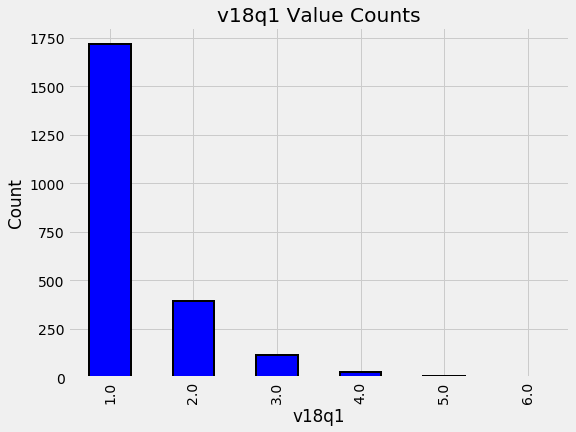

In [116]:
plot_value_counts(heads, 'v18q1')

존재하는 데이터로만 가면 소유 할 가장 일반적인 태블릿 수는 1 인 것 같습니다.   
그러나 우리는 또한 누락 된 데이터에 대해 생각할 필요가 있습니다.  
이 경우이 카테고리에 Nan 이 있는 가족은 태블릿을 소유하지 않을 수 있습니다!  
데이터 정의를 살펴보면 v18q는 가족이 태블릿을 소유하고 있는지 여부를 나타냅니다. 가설이 맞는지 알아 보려면이 열과 태블릿 수를 조사해야합니다.

`v18q` 값 (태블릿을 소유 한 경우 1이고 소유하지 않은 경우 0)으로 그룹화 한 다음 v18q1의 null 값 수를 계산할 수 있습니다.  
null 값이 가족이 태블릿을 소유하지 않음을 나타내는 지 여부를 알려줍니다.

In [117]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

In [118]:
data['v18q1'] = data['v18q1'].fillna(0)

### v2a1
: 월세, 월 임대료

월 임대료의 누락 된 값을 보는 것 외에도 주택의 소유권 / 임대 상태를 보여주는 열인 `tipovivi_`의 분포를 보는 것도 흥미로울 것입니다.  
이 플롯의 경우 월세 지불에 대해 nan이있는 주택의 소유권 상태를 보여줍니다.

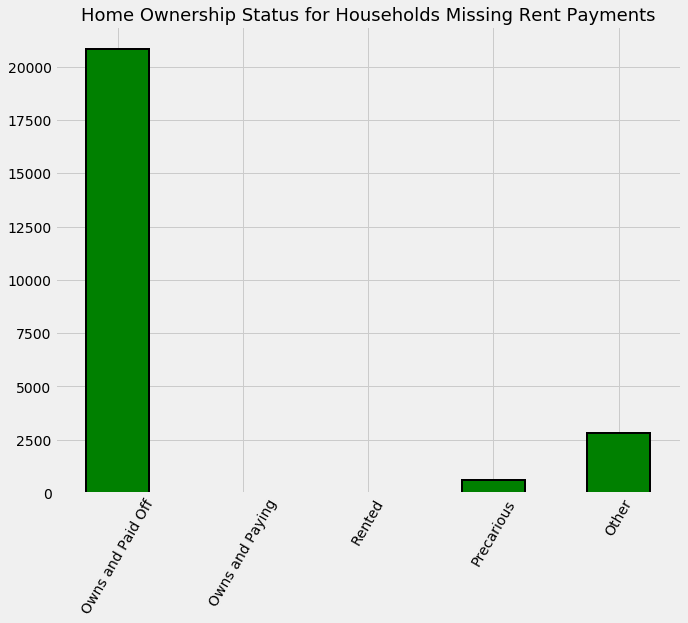

In [119]:
# 주택 소유하는 가구의 데이터(tipo로 시작하는 칼럼)
own_variables = [x for x in data if x.startswith('tipo')]


# 주택 소유면서, 월세 지불 값이 nan 확인을 위한 플롯
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),color = 'green',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);



- `tipovivi1`, =1 own and fully paid house (자가, 매매, 노 할부)
- `tipovivi2`, =1 own,  paying in installments (자가, 매매, 할부 있음)
- `tipovivi3`, =1 rented (렌트)
- `tipovivi4`, =1 precarious (불확실)
- `tipovivi5`, =1 other(assigned,  borrowed) = 뭔가 다른거


대부분, 월세를 내지 않는 가구는 일반적으로 자신의 집을 소유합니다.   
다른 몇 가지 상황에서는 정보가 누락 된 이유를 알 수 없습니다.


소유하고 월 임대료가 누락 된 주택의 경우 임대료 값을 0으로 설정할 수 있습니다.  
다른 주택의 경우 누락 된 값을 대치하도록 둘 수 있지만 이러한 가구에 누락 된 값이 있음을 나타내는 플래그 (Boolean) 열을 추가합니다.

In [120]:
# 집 소유하면서 , 월세 지불 0원인 경우 -> nan을 0으로 채우기
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0

# 월세 지불 nan 인 df 생성
data['v2a1-missing'] = data['v2a1'].isnull()
data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

### rez_esc

: 학교에서의 기간?(years behind in school)  
  
null 값을 가진 가정의 경우 현재 학교에 자녀가 없을 수 있다.  

In [121]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

결측값인 경우 학교다니는 애의 최고 나이가 17 세라는 것입니다.  
이보다 더 나이가 많은 사람은 단순히 학교에 다니지 않는다고 가정 할 수 있습니다.  
결측값이 있는 사람들의 나이를 살펴 보겠습니다.

In [122]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

- 즉, 변수'rez_esc'는 7 세에서 19 세 사이의 개인에 대해서만 정의된다  
- 이 범위보다 더 어리거나 나이가 많은 사람은 아마도 연도를 늦추지 않으므로 값을 0으로 설정해야합니다.   
- 이 변수는 개인이 19 세 이상이고 결측값이 있거나 7 세 미만이고 결측값이있는 경우 0으로 설정할 수 있습니다.   
- 다른 사람에게는 값을 대치 한 상태로두고 boolean flag를 추가합니다.

In [123]:
# 개인 나이가  over 19 or younger than 7 이면서 missing years behind 이라면 -> '0'
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# 새로운 칼럼 추가 나이가 7 ~19 이면서 결측값이라면,
data['rez_esc-missing'] = data['rez_esc'].isnull()

변수'rez_esc'의 최대 값이 5라는 것을 알 수 있습니다. 따라서 5 이상의 값은 5로 설정해야합니다.

In [124]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

## Plot Two Categorical Variables
두 범주 형 변수가 서로 상호 작용하는 방식을 보여주기 위해 산점도를 그리려함.   
두 범주의 산점도. 여기서 **점의 크기는 각 x- 값으로 나타내는 y- 값의 백분율**을 나타냅니다.

In [125]:
# 산점도 그리고자 자체 플롯 함수 제작
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False)) 
                                         #normalize :True이면 반환 된 개체에 고유 값의 상대 빈도가 포함됩니다.
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}");
    plt.ylabel(f"{y}"); 
    plt.title(f"{y} vs {x}");

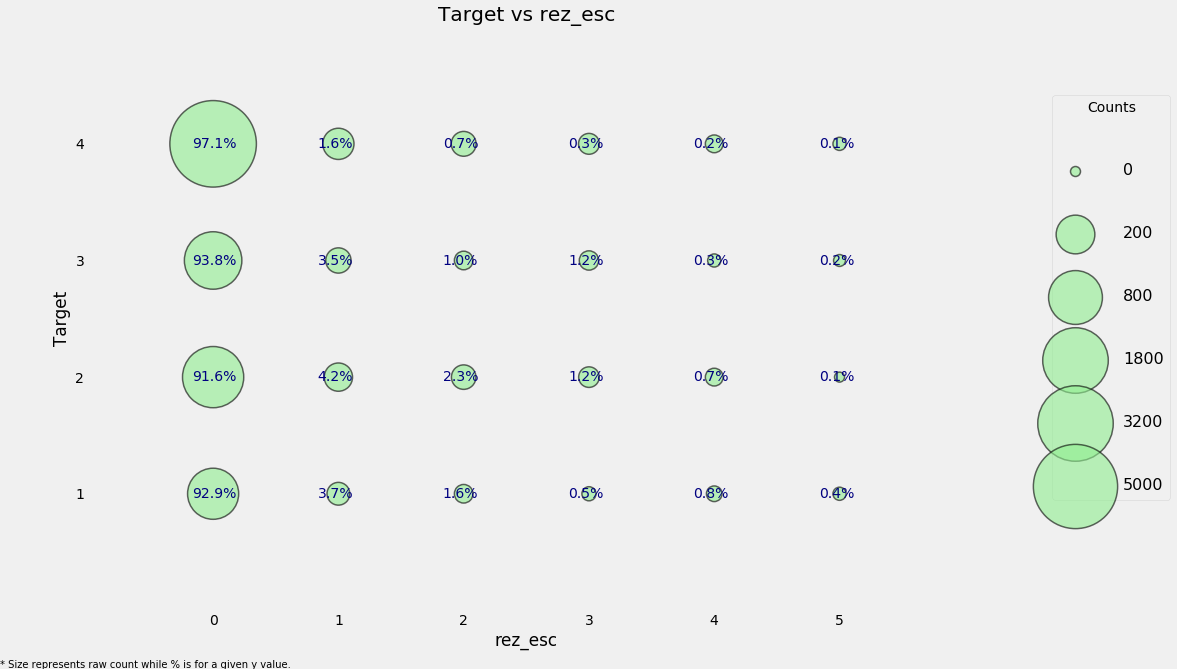

In [126]:
plot_categoricals('rez_esc', 'Target', data);

마커의 크기는 raw count를 나타냅니다.  
플롯을 읽으려면 주어진 y 값을 선택한 다음 행 전체를 읽으십시오.  
예를 들어, 빈곤 수준이 1 인 경우 개인의 93 %는 총 800 명의 개인으로 연체가 없으며 개인의 약 0.4 %는이 범주에있는 총 50 명의 개인으로 5 년 뒤에 있습니다. 이 그림은 전체 개수와 범주 내 비율을 모두 표시하려고합니다.

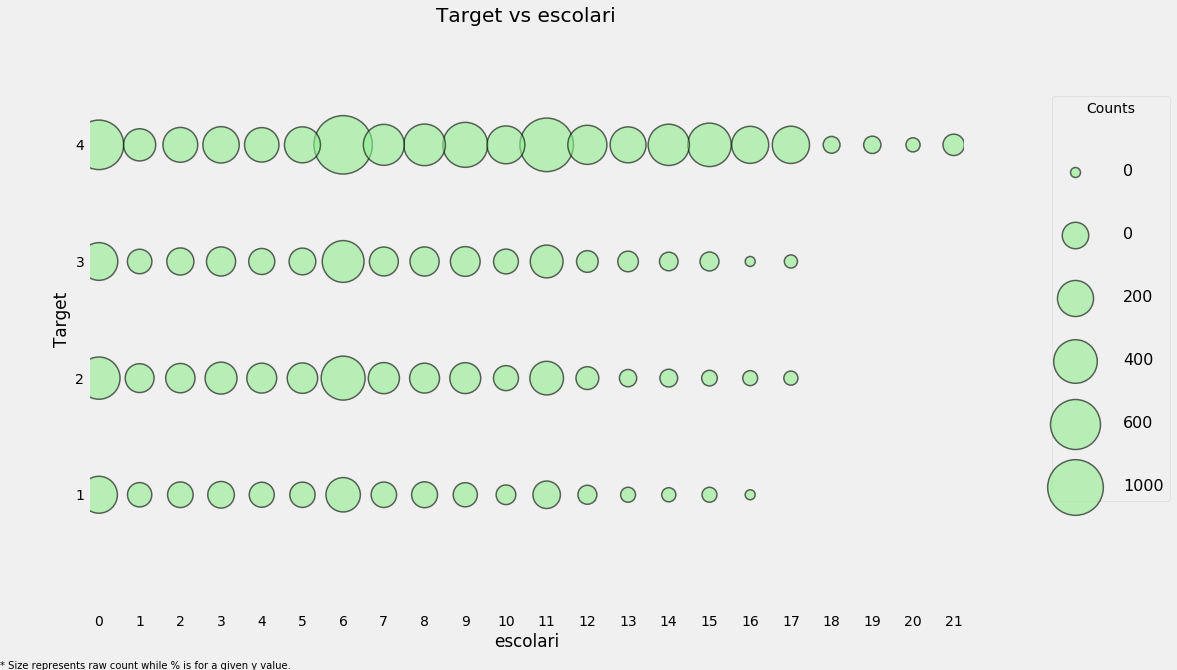

In [127]:
plot_categoricals('escolari', 'Target', data, annotate = False)

각 열의 나머지 누락 된 값은 `Imputer`라고하는 프로세스로 채워집니다.  
가장 간단하고 효과적인 방법 중 하나는 누락 된 값을 열의 `중앙값`으로 채우는 것입니다.  
누락 된 값이있는 마지막 단계로 이러한 값 중 하나가 누락 된 경우에 대한 목표 분포를 플로팅 할 수 있습니다.

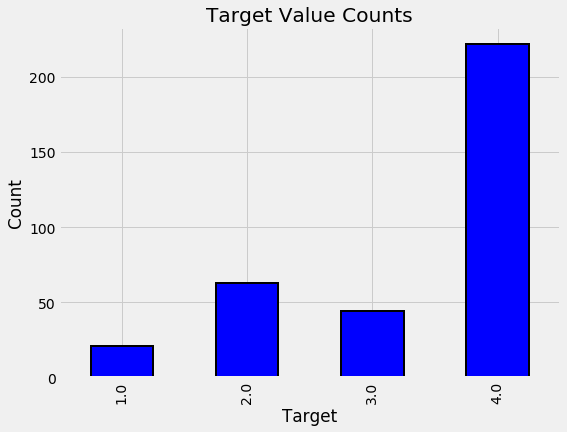

In [128]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 'Target')

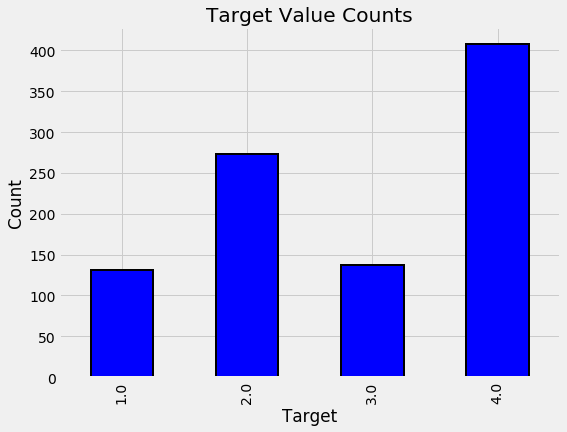

In [129]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 'Target')

# Feature Engineering

## Column Definitions

  
데이터 설명을 사용하여 개별 수준과 가구 수준에있는 열을 정의해야합니다.   
데이터 설명에서 변수 자체를 살펴 보는 것보다 가구 수준의 변수를 식별하는 다른 방법은 없습니다.  
제외하고는 이미이 작업을 수행 했으므로 복사하여 붙여 넣기 만하면됩니다.

---
일부 변수를 다른 방식으로 처리해야하기 때문에 다른 변수를 정의 할 것입니다.   
각 수준에서 정의 된 변수가 있으면 필요에 따라 집계를 시작할 수 있습니다.

1. 변수를 가구 수준과 개인 수준으로 나누기
2. 개별 레벨 데이터에 적합한 집계 찾기
 - 순서 형 변수는 통계 집계를 사용할 수 있습니다.
 - 부울 변수도 집계 할 수 있지만 통계는 더 적습니다.
3. 개별 집계를 가구 수준 데이터에 결합

---
## Define Variable Categories
There are several different categories of variables:
  
1. Individual Variables: these are characteristics of each individual rather than the household
 - Boolean: Yes or No (0 or 1)
 - Ordered Discrete: Integers with an ordering
2. Household variables
  - Boolean: Yes or No
  - Ordered Discrete: Integers with an ordering
  - Continuous numeric
3. Squared Variables: derived from squaring variables in the data
4. Id variables: identifies the data and should not be used as features

  
  Below we manually define the variables in each category. This is a little tedious, but also necessary.

In [130]:
id_ = ['Id', 'idhogar', 'Target']

In [131]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [132]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']


In [133]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [134]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


In [135]:
data

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0      ID_279628684  190000.0       0      3       0     1       1     0   
1      ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2      ID_68de51c94       0.0       0      8       0     1       1     0   
3      ID_d671db89c  180000.0       0      5       0     1       1     1   
4      ID_d56d6f5f5  180000.0       0      5       0     1       1     1   
...             ...       ...     ...    ...     ...   ...     ...   ...   
33408  ID_a065a7cad       0.0       1      2       1     1       1     0   
33409  ID_1a7c6953b       0.0       0      3       0     1       1     0   
33410  ID_07dbb4be2       0.0       0      3       0     1       1     0   
33411  ID_34d2ed046       0.0       0      3       0     1       1     0   
33412  ID_34754556f       0.0       0      3       0     1       1     0   

       v18q1  r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  \
0        0.0     0     1     1     0     0     0     0     1     1       1   
1        1.0     0     1     1     0     0     0     0     1     1       1   
2        0.0     0     0     0     0     1     1     0     1     1       1   
3        1.0     0     2     2     1     1     2     1     3     4       4   
4        1.0     0     2     2     1     1     2     1     3     4       4   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...     ...   
33408    0.0     0     2     2     1     3     4     1     5     6       6   
33409    0.0     0     1     1     0     3     3     0     4     4       4   
33410    0.0     0     1     1     0     3     3     0     4     4       4   
33411    0.0     0     1     1     0     3     3     0     4     4       4   
33412    0.0     0     1     1     0     3     3     0     4     4       4   

       tamviv  escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  \
0           1        10      0.0       1            1            0          0   
1           1        12      0.0       1            0            0          0   
2           1        11      0.0       1            0            0          0   
3           4         9      1.0       4            1            0          0   
4           4        11      0.0       4            1            0          0   
...       ...       ...      ...     ...          ...          ...        ...   
33408       6         3      0.0       6            0            0          0   
33409       4         6      0.0       4            0            0          1   
33410       4         4      1.0       4            0            0          1   
33411       4         5      0.0       4            0            0          1   
33412       4         6      0.0       4            0            0          1   

       pareddes  paredmad  paredzinc  paredfibras  paredother  pisomoscer  \
0             0         0          0            0           0           1   
1             0         1          0            0           0           0   
2             0         1          0            0           0           1   
3             0         0          0            0           0           1   
4             0         0          0            0           0           1   
...         ...       ...        ...          ...         ...         ...   
33408         0         1          0            0           0           0   
33409         0         0          0            0           0           0   
33410         0         0          0            0           0           0   
33411         0         0          0            0           0           0   
33412         0         0          0            0           0           0   

       pisocemento  pisoother  pisonatur  pisonotiene  pisomadera  techozinc  \
0                0          0          0            0           0          0   
1                0          0          0            0           1          1   
2                0          0

### Squared Variables

첫째, 가장 쉬운 단계 : **제곱 변수를 모두 제거**합니다.  
선형 모델이 비선형 관계를 학습하는 데 도움이 될 수 있기 때문에 변수가 특성 엔지니어링의 일부로 제곱되거나 변환되는 경우가 있습니다.  
그러나 더 복잡한 모델을 사용할 것이므로 이러한 제곱 기능은 중복됩니다.   
비 제곱 버전과 높은 상관 관계가 있으므로 관련없는 정보를 추가하고 학습 속도를 늦춤으로써 실제로 모델을 손상시킬 수 있습니다.

For an example, let's take a look at `SQBage` vs `age`.

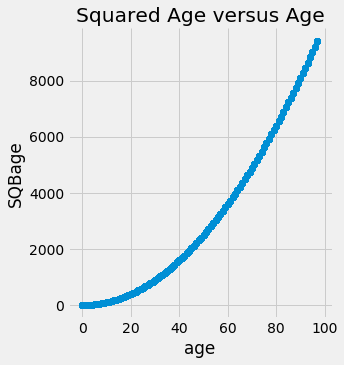

In [136]:
sns.lmplot('age', 'SQBage', data = data, fit_reg=False);
plt.title('Squared Age versus Age');

In [137]:
# 제곱변수 제거
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

### Id Variables

식별을 위해 필요하므로 데이터에있는 그대로 유지됩니다.    

### Household Level Variables

먼저 가장에 대한 부분 집합을 설정 한 다음,   
세대 수준 변수에 대해 살펴 보겠습니다.

In [138]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

In [139]:
heads

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  \
0      ID_279628684  21eb7fcc1     4.0       0       0     1       1   
1      ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1   
2      ID_68de51c94  2c7317ea8     4.0       0       0     1       1   
5      ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1   
8      ID_1284f8aad  d6dae86b7     4.0       1       0     1       1   
...             ...        ...     ...     ...     ...   ...     ...   
33393  ID_265b917e8  e44cb9969     NaN       0       0     0       0   
33398  ID_19c0b1480  935a65ffa     NaN       0       0     1       1   
33400  ID_aa256c594  2edb6f51e     NaN       0       0     1       1   
33404  ID_4b7feead3  3aa78c56b     NaN       1       1     1       1   
33409  ID_1a7c6953b  d237404b6     NaN       0       0     1       1   

       paredblolad  paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
0                1            0          0            0         0         0   
1                0            0          0            0         0         1   
2                0            0          0            0         0         1   
5                1            0          0            0         0         0   
8                1            0          0            0         0         0   
...            ...          ...        ...          ...       ...       ...   
33393            0            0          0            0         0         1   
33398            0            0          0            1         0         1   
33400            0            0          0            1         0         1   
33404            0            0          0            1         0         1   
33409            0            0          1            1         0         0   

       paredzinc  paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
0              0            0           0           1          0          0   
1              0            0           0           0          0          0   
2              0            0           0           1          0          0   
5              0            0           0           1          0          0   
8              0            0           0           1          0          0   
...          ...          ...         ...         ...        ...        ...   
33393          0            0           0           0          0          0   
33398          0            0           0           0          0          0   
33400          0            0           0           0          0          0   
33404          0            0           0           0          0          0   
33409          0            0           0           0          0          0   

       pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
0                0           0          0               1          0   
1                0           1          1               0          0   
2                0           0          1               0          0   
5                0           0          1               0          0   
8                0           0          1               0          0   
...            ...         ...        ...             ...        ...   
33393            0           1          1               0          0   
33398            0           0          1               0          0   
33400            0           0          1               0          0   
33404            0           0          1               0          0   
33409            0           0          1               0          0   

       techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  \
0              0          1                1               0            0   
1              0          1                1               0            0   
2              0          1                1               0            0   
5              0          1                1               0            0   
8   

### Redundant Household Variables (중복 가구 변수)

모든 가구 변수 간의 상관 관계를 살펴 보겠습니다.   
너무 높은 상관 관계가있는 변수가 있으면->상관 관계가 높은 변수 쌍 중 하나를 제거 할 수 있습니다.


In [140]:
# 절대 크기 상관 관계가 0.95보다 큰 모든 변수를 식별

# 상관계수 matrix 생성
corr_matrix = heads.corr()

# 상관 행렬의 위쪽 삼각형 선택
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 상관계수 절댓값이 0.95보다 큰 칼럼의 인덱스 추출 -> 리스트화
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [141]:
corr_matrix

Target    hacdor    hacapo      v14a    refrig  paredblolad  \
Target        1.000000 -0.136275 -0.096313  0.068230  0.119607     0.254469   
hacdor       -0.136275  1.000000  0.593867 -0.086701 -0.066409    -0.113787   
hacapo       -0.096313  0.593867  1.000000 -0.123276 -0.075336    -0.094350   
v14a          0.068230 -0.086701 -0.123276  1.000000  0.145417     0.065795   
refrig        0.119607 -0.066409 -0.075336  0.145417  1.000000     0.128958   
...                ...       ...       ...       ...       ...          ...   
hogar_adul    0.127904  0.043431  0.046811  0.042932  0.095142     0.077227   
hogar_mayor  -0.025173 -0.058321 -0.043296  0.017662  0.019801     0.052410   
hogar_total  -0.111557  0.246793  0.195462  0.007458  0.056927    -0.033010   
bedrooms      0.135203 -0.189177 -0.126525  0.080487  0.137889     0.166149   
qmobilephone  0.168685  0.026514  0.036755  0.046128  0.134561     0.073779   

              paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
Target          -0.078851  -0.104545    -0.209131 -0.096893 -0.152979   
hacdor           0.026165   0.019816     0.110713  0.122610  0.068846   
hacapo           0.022254   0.007634     0.089127  0.134901  0.042265   
v14a             0.002527   0.007668    -0.020410 -0.128082 -0.068496   
refrig          -0.042125  -0.006812    -0.099088 -0.088633 -0.114895   
...                   ...        ...          ...       ...       ...   
hogar_adul      -0.024205  -0.050961    -0.071587 -0.019126 -0.029333   
hogar_mayor      0.017119  -0.086869    -0.078257 -0.019208  0.025679   
hogar_total     -0.010640   0.031997     0.041957  0.019260  0.000551   
bedrooms        -0.032534  -0.079613    -0.165024 -0.057864 -0.096135   
qmobilephone    -0.046875   0.010504    -0.078906 -0.023568 -0.079445   

              paredzinc  paredfibras  paredother  pisomoscer  pisoother  \
Target        -0.040128    -0.039861    0.005231    0.275452   0.016832   
hacdor         0.086632    -0.007015   -0.005960   -0.143259  -0.005960   
hacapo         0.118369    -0.005219   -0.004434   -0.120922  -0.004434   
v14a          -0.034484     0.003483    0.002960    0.094633   0.002960   
refrig        -0.049882    -0.013233    0.007742    0.184785   0.007742   
...                 ...          ...         ...         ...        ...   
hogar_adul    -0.004375    -0.003967    0.004132    0.082065   0.004132   
hogar_mayor   -0.030207     0.015424    0.003259    0.069048   0.007689   
hogar_total    0.044309    -0.006349    0.003235   -0.042462   0.015317   
bedrooms      -0.052869    -0.009185   -0.007966    0.199451   0.018329   
qmobilephone   0.000407    -0.016652   -0.005257    0.110785   0.004745   

              pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
Target        -0.054463    -0.114144   -0.103487   0.014357        0.032872   
hacdor         0.026892     0.116650    0.026372  -0.036627       -0.007641   
hacapo        -0.002458     0.115475    0.023931  -0.047382       -0.007023   
v14a          -0.057915    -0.140181   -0.076321   0.047145        0.012098   
refrig        -0.019392    -0.162552   -0.105376   0.016262        0.015251   
...                 ...          ...         ...        ...             ...   
hogar_adul    -0.005050    -0.013116   -0.026497   0.023670       -0.028640   
hogar_mayor    0.021459    -0.024801    0.012454  -0.002127        0.002354   
hogar_total    0.000119     0.038302   -0.011582   0.014178       -0.029371   
bedrooms      -0.017781    -0.090485   -0.053870   0.026258       -0.020845   
qmobilephone  -0.006242    -0.041059   -0.055693   0.016296       -0.011084   

              techocane  techootro  cielorazo  abastaguadentro  \
Target        -0.026240   0.031516   0.295249         0.062961   
hacdor        -0.008595  -0.006613  -0.148678        -0.036094   
hacapo        -0.006394  -0.004920  -0.131246        -0.038001   
v14a           0.004268   0.003284   0.087430         0.169428   
refrig    

In [142]:
np.ones(corr_matrix.shape) #1로 채워지면서, 상관행렬과 같은 크기 행렬 만듬

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [143]:
np.triu(np.ones(corr_matrix.shape), k=1) 
# np.triu : upper triangle 
# k 번째 대각선 아래의 요소가 0 인 행렬의 복사본을 반환합니다.

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [144]:
# no.bool : boolean 으로 데이터 타입 변환
np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)    

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [145]:
upper 
# 조건에 맞는 값의 색인 위치: np.where()

Target    hacdor    hacapo      v14a    refrig  paredblolad  \
Target           NaN -0.136275 -0.096313  0.068230  0.119607     0.254469   
hacdor           NaN       NaN  0.593867 -0.086701 -0.066409    -0.113787   
hacapo           NaN       NaN       NaN -0.123276 -0.075336    -0.094350   
v14a             NaN       NaN       NaN       NaN  0.145417     0.065795   
refrig           NaN       NaN       NaN       NaN       NaN     0.128958   
...              ...       ...       ...       ...       ...          ...   
hogar_adul       NaN       NaN       NaN       NaN       NaN          NaN   
hogar_mayor      NaN       NaN       NaN       NaN       NaN          NaN   
hogar_total      NaN       NaN       NaN       NaN       NaN          NaN   
bedrooms         NaN       NaN       NaN       NaN       NaN          NaN   
qmobilephone     NaN       NaN       NaN       NaN       NaN          NaN   

              paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
Target          -0.078851  -0.104545    -0.209131 -0.096893 -0.152979   
hacdor           0.026165   0.019816     0.110713  0.122610  0.068846   
hacapo           0.022254   0.007634     0.089127  0.134901  0.042265   
v14a             0.002527   0.007668    -0.020410 -0.128082 -0.068496   
refrig          -0.042125  -0.006812    -0.099088 -0.088633 -0.114895   
...                   ...        ...          ...       ...       ...   
hogar_adul            NaN        NaN          NaN       NaN       NaN   
hogar_mayor           NaN        NaN          NaN       NaN       NaN   
hogar_total           NaN        NaN          NaN       NaN       NaN   
bedrooms              NaN        NaN          NaN       NaN       NaN   
qmobilephone          NaN        NaN          NaN       NaN       NaN   

              paredzinc  paredfibras  paredother  pisomoscer  pisoother  \
Target        -0.040128    -0.039861    0.005231    0.275452   0.016832   
hacdor         0.086632    -0.007015   -0.005960   -0.143259  -0.005960   
hacapo         0.118369    -0.005219   -0.004434   -0.120922  -0.004434   
v14a          -0.034484     0.003483    0.002960    0.094633   0.002960   
refrig        -0.049882    -0.013233    0.007742    0.184785   0.007742   
...                 ...          ...         ...         ...        ...   
hogar_adul          NaN          NaN         NaN         NaN        NaN   
hogar_mayor         NaN          NaN         NaN         NaN        NaN   
hogar_total         NaN          NaN         NaN         NaN        NaN   
bedrooms            NaN          NaN         NaN         NaN        NaN   
qmobilephone        NaN          NaN         NaN         NaN        NaN   

              pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
Target        -0.054463    -0.114144   -0.103487   0.014357        0.032872   
hacdor         0.026892     0.116650    0.026372  -0.036627       -0.007641   
hacapo        -0.002458     0.115475    0.023931  -0.047382       -0.007023   
v14a          -0.057915    -0.140181   -0.076321   0.047145        0.012098   
refrig        -0.019392    -0.162552   -0.105376   0.016262        0.015251   
...                 ...          ...         ...        ...             ...   
hogar_adul          NaN          NaN         NaN        NaN             NaN   
hogar_mayor         NaN          NaN         NaN        NaN             NaN   
hogar_total         NaN          NaN         NaN        NaN             NaN   
bedrooms            NaN          NaN         NaN        NaN             NaN   
qmobilephone        NaN          NaN         NaN        NaN             NaN   

              techocane  techootro  cielorazo  abastaguadentro  \
Target        -0.026240   0.031516   0.295249         0.062961   
hacdor        -0.008595  -0.006613  -0.148678        -0.036094   
hacapo        -0.006394  -0.004920  -0.131246        -0.038001   
v14a           0.004268   0.003284   0.087430         0.169428   
refrig         0.002038   0.0085

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']  
이들은 각 상관 변수 쌍 중 하나를 보여줍니다.   
다른 쌍을 찾기 위해 corr_matrix를 부분 집합 할 수 있습니다.

In [146]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000

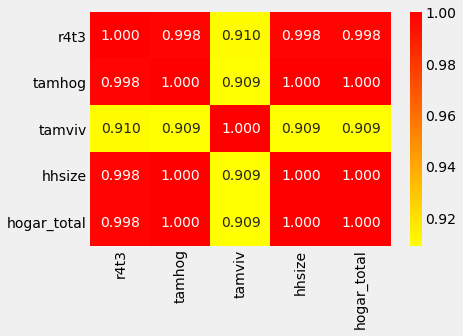

In [147]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f'); 
# annot=True 를 써서 각 셀에 숫자를 입력


`집의 크기`와 관련된 몇 가지 변수가 있습니다.

- `r4t3` : 총 가구원
- `tamhog` : 가구의 규모
- `tamviv` : 가구에 사는 사람 수
- `hhsize` :  가구 크기
- `hogar_total` : 가구의 총 개인 수
  
  
이러한 변수는 모두 서로 높은 상관 관계가 있습니다.  
사실, `hhsize`는 `tamhog` 및 `hogar_total`과 **완벽한 상관 관계**가 있습니다.   
**정보가 중복되므로이 두 변수를 제거**합니다.   
`r4t3`는 `hhsize`와 거의 완벽한 상관 관계가 있으므로 제거 할 수도 있습니다.
  
`tamviv`는 가정에 거주하지 않는 가족 구성원이있을 수 있으므로 반드시 `hhsize`와 동일하지는 않습니다.  
이 차이를 산점도에서 시각화 해 보겠습니다.

In [148]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

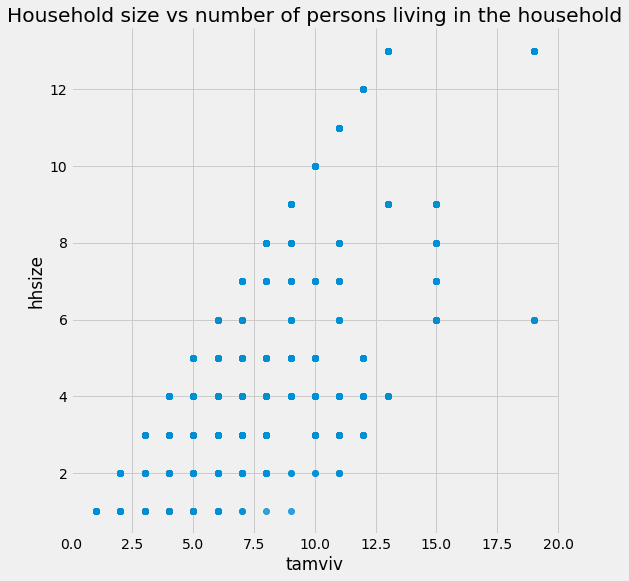

In [149]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size = 8);
plt.title('Household size vs number of persons living in the household');

# Implot의 fit_reg : bool, optional
# True이면 x 및 y 변수와 관련된 회귀 모델을 추정하고 플로팅합니다.

`tamviv` : 가구에 사는 사람 수  
`hhsize`: 가구 크기  

가족(가구크기)보다 더 많은 사람들이 한 집에 살고 있습니다.  
**이 두 측정의 차이**를 이용해!! 새로운 기능을 만들어 보겠습니다.

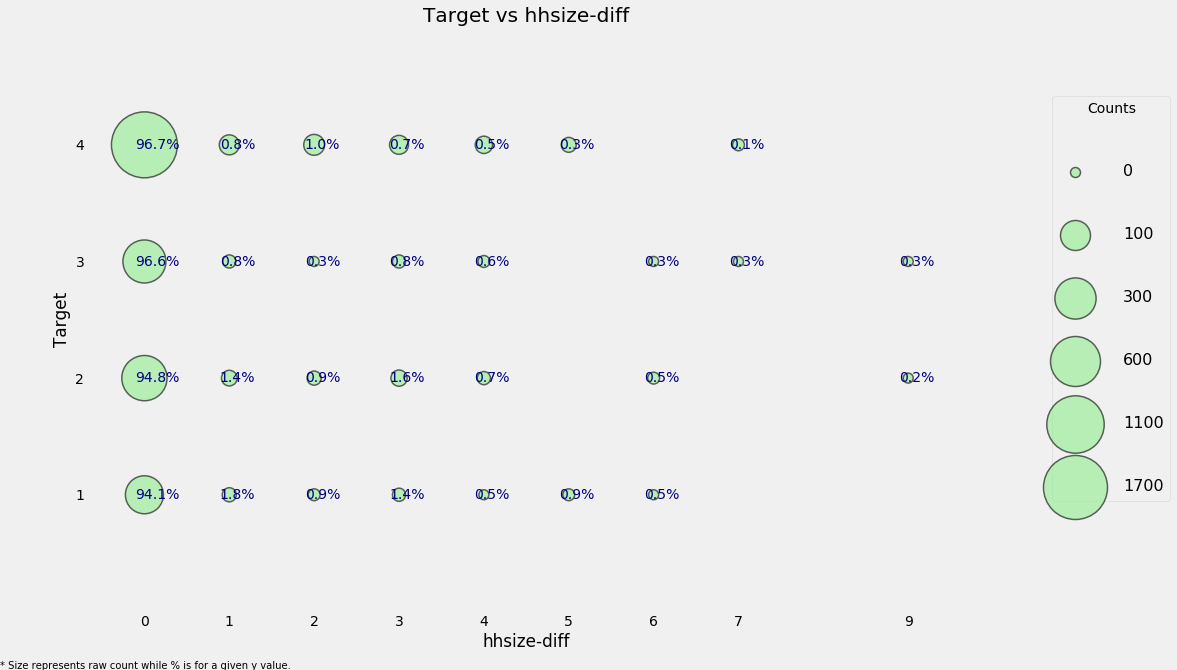

In [150]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

대부분의 가구에는 차이가 없지만 가구 구성원보다 가구에 더 많은 사람이 사는 가구가 있습니다.

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']


다른 중복 변수로 `coopele`을 보면!

In [151]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

public   coopele
public   1.000000 -0.967759
coopele -0.967759  1.000000

`coopele`와 `public`변수는 가정의 전기가 어디에서 나오는지 나타냅니다.   
네 가지 옵션이 있으며, 나머지는 전기가 없거나 `noelec`,  개인 공장에서 가져오는 경우`planpri`

### Creating Ordinal Variable (서수 변수 만들기) _ `coopele` - 전기관련 변수

서수 변수를 만들어서이 4 개의 변수(`coopele`,`public`,`noelec`,`planpri`)를 하나로 압축하겠습니다.   
데이터 설명에 따라 직접 매핑을 선택하겠습니다.  
  
- 0: No electricity  -< `public`
- 1: Electricity from cooperative   -> `coopele`
- 2: Electricity from CNFL, ICA, ESPH/JASEC  -> `public`
- 3: Electricity from private plant  -> `planpri`

---
순서가 지정된 변수에는 고유 한 순서가 있으며 이를 위해 도메인 지식에 따라 자체적으로 선택합니다.   
이 새로운 순서가 지정된 변수를 생성 한 후 나머지 4 개를 삭제할 수 있습니다.   
여기에 값이 없는 가구가 여러 개 있으므로 `nan` (대치 중에 채워짐)을 사용하고이 변수에 대한 측정 값이 없음을 나타내는 부울 열을 추가합니다.

In [152]:
elec = []

# 4개에 하나도 해당되지 않아 전기공급 상황을 알 수 없는 가구를 파악하기 위한 elec 칼럼 생성. 
for i, row in heads.iterrows():   # pd.iterrows() : 데이터 프레임의 행을 반복하며 행 자체를 포함하는 객체에 덧붙여 각 행의 색인을 반환
    if row['noelec'] == 1: 
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)   # 4개중 하나도 해당안되면 nan으로 채움
        
# heads에 만든 칼럼 추가
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

# Remove the electricity columns
# heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

In [153]:
heads #각 가구의 세대주만 모은 데이터

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  \
0      ID_279628684  21eb7fcc1     4.0       0       0     1       1   
1      ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1   
2      ID_68de51c94  2c7317ea8     4.0       0       0     1       1   
5      ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1   
8      ID_1284f8aad  d6dae86b7     4.0       1       0     1       1   
...             ...        ...     ...     ...     ...   ...     ...   
33393  ID_265b917e8  e44cb9969     NaN       0       0     0       0   
33398  ID_19c0b1480  935a65ffa     NaN       0       0     1       1   
33400  ID_aa256c594  2edb6f51e     NaN       0       0     1       1   
33404  ID_4b7feead3  3aa78c56b     NaN       1       1     1       1   
33409  ID_1a7c6953b  d237404b6     NaN       0       0     1       1   

       paredblolad  paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
0                1            0          0            0         0         0   
1                0            0          0            0         0         1   
2                0            0          0            0         0         1   
5                1            0          0            0         0         0   
8                1            0          0            0         0         0   
...            ...          ...        ...          ...       ...       ...   
33393            0            0          0            0         0         1   
33398            0            0          0            1         0         1   
33400            0            0          0            1         0         1   
33404            0            0          0            1         0         1   
33409            0            0          1            1         0         0   

       paredzinc  paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
0              0            0           0           1          0          0   
1              0            0           0           0          0          0   
2              0            0           0           1          0          0   
5              0            0           0           1          0          0   
8              0            0           0           1          0          0   
...          ...          ...         ...         ...        ...        ...   
33393          0            0           0           0          0          0   
33398          0            0           0           0          0          0   
33400          0            0           0           0          0          0   
33404          0            0           0           0          0          0   
33409          0            0           0           0          0          0   

       pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
0                0           0          0               1          0   
1                0           1          1               0          0   
2                0           0          1               0          0   
5                0           0          1               0          0   
8                0           0          1               0          0   
...            ...         ...        ...             ...        ...   
33393            0           1          1               0          0   
33398            0           0          1               0          0   
33400            0           0          1               0          0   
33404            0           0          1               0          0   
33409            0           0          1               0          0   

       techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  \
0              0          1                1               0            0   
1              0          1                1               0            0   
2              0          1                1               0            0   
5              0          1                1               0            0   
8   

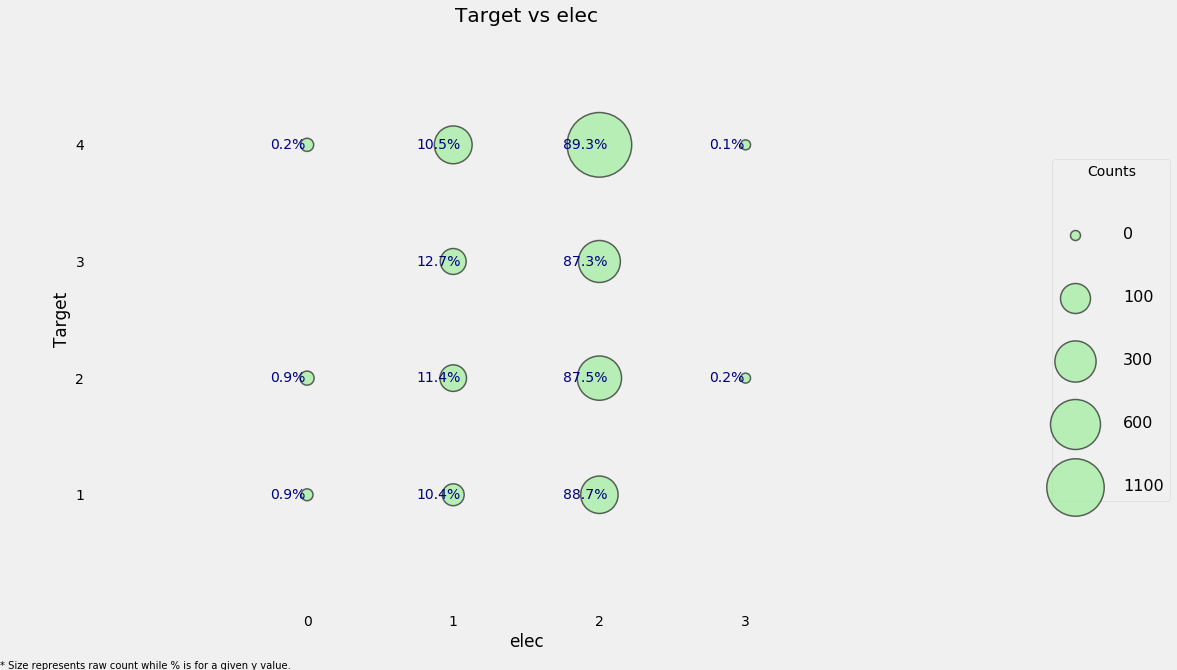

In [154]:
plot_categoricals('elec', 'Target', heads)


Target의 모든 값에 대해 가장 일반적인 전기 공급원은 나열된 공급원 중 하나에 해당
  
  
마지막 중복 열은 `area2`입니다.   
`area2` : 집이 시골 지역에 있다는 것을 의미! 이는 **집이 도시 지역에 있는지를 나타내는 열이 있기 때문에 중복됩니다.**   
따라서이 열을 삭제할 수 있습니다.  

In [155]:
heads = heads.drop(columns = 'area2')

heads.groupby('area1')['Target'].value_counts(normalize = True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

도시 지역의 가구 (값 1)가 농촌 지역의 가구 (값 0)보다 빈곤 수준이 낮을 가능성이 더 높은 것 같습니다.

### Creating Ordinal Variable (서수 변수 만들기) _ `epared1`,	`epared2`,	`epared3	` - 집, 지붕, 바닥 상태

집의 벽, 지붕 및 바닥에는 각각 세 개의 기둥이 있습니다.  
첫 번째는 '나쁨', 두 번째 '보통', 세 번째 '좋은'기둥입니다.  
변수를 부울로 둘 수는 있지만 내재 된 순서가 있기 때문에 순서 형 변수로 바꾸는 것이 더 합리적!   
: **bad <regular <good**  
이를 위해 `np.argmax`를 사용하여 각 가구에 대해 0이 아닌 열을 찾을 수 있습니다.

서수 변수를 만든 후에는 원래 변수를 삭제할 수 있습니다.

In [156]:
heads

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  \
0      ID_279628684  21eb7fcc1     4.0       0       0     1       1   
1      ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1   
2      ID_68de51c94  2c7317ea8     4.0       0       0     1       1   
5      ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1   
8      ID_1284f8aad  d6dae86b7     4.0       1       0     1       1   
...             ...        ...     ...     ...     ...   ...     ...   
33393  ID_265b917e8  e44cb9969     NaN       0       0     0       0   
33398  ID_19c0b1480  935a65ffa     NaN       0       0     1       1   
33400  ID_aa256c594  2edb6f51e     NaN       0       0     1       1   
33404  ID_4b7feead3  3aa78c56b     NaN       1       1     1       1   
33409  ID_1a7c6953b  d237404b6     NaN       0       0     1       1   

       paredblolad  paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
0                1            0          0            0         0         0   
1                0            0          0            0         0         1   
2                0            0          0            0         0         1   
5                1            0          0            0         0         0   
8                1            0          0            0         0         0   
...            ...          ...        ...          ...       ...       ...   
33393            0            0          0            0         0         1   
33398            0            0          0            1         0         1   
33400            0            0          0            1         0         1   
33404            0            0          0            1         0         1   
33409            0            0          1            1         0         0   

       paredzinc  paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
0              0            0           0           1          0          0   
1              0            0           0           0          0          0   
2              0            0           0           1          0          0   
5              0            0           0           1          0          0   
8              0            0           0           1          0          0   
...          ...          ...         ...         ...        ...        ...   
33393          0            0           0           0          0          0   
33398          0            0           0           0          0          0   
33400          0            0           0           0          0          0   
33404          0            0           0           0          0          0   
33409          0            0           0           0          0          0   

       pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
0                0           0          0               1          0   
1                0           1          1               0          0   
2                0           0          1               0          0   
5                0           0          1               0          0   
8                0           0          1               0          0   
...            ...         ...        ...             ...        ...   
33393            0           1          1               0          0   
33398            0           0          1               0          0   
33400            0           0          1               0          0   
33404            0           0          1               0          0   
33409            0           0          1               0          0   

       techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  \
0              0          1                1               0            0   
1              0          1                1               0            0   
2              0          1                1               0            0   
5              0          1                1               0            0   
8   

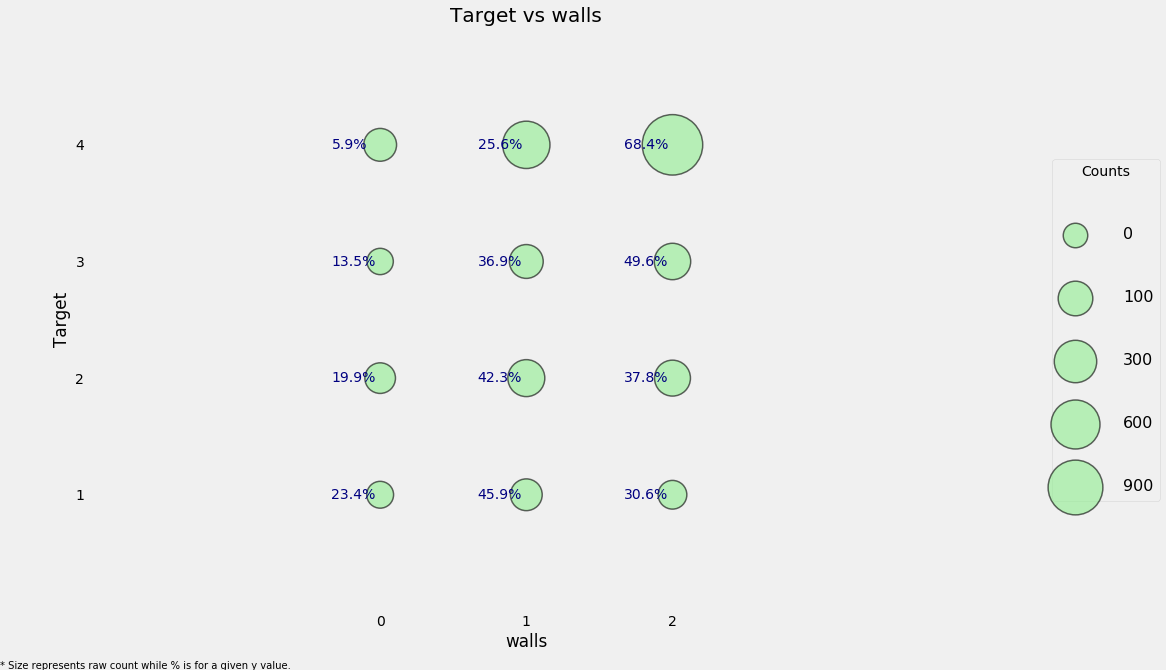

In [157]:
# Wall ordinal variable(Wall에 대한 서수 변수 )
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),axis = 1)

# heads = heads.drop(columns = ['epared1', 'epared2', 'epared3']) # wall 변수 하나로 통합했으니 기존 칼럼 삭제
plot_categoricals('walls', 'Target', heads)

In [158]:
heads[['epared1', 'epared2', 'epared3']]

epared1  epared2  epared3
0            0        1        0
1            0        1        0
2            0        1        0
5            0        0        1
8            1        0        0
...        ...      ...      ...
33393        0        1        0
33398        1        0        0
33400        0        1        0
33404        1        0        0
33409        0        0        1

[10307 rows x 3 columns]

In [159]:
np.array(heads[['epared1', 'epared2', 'epared3']])

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [160]:
# np.argmax(a, axis) : a 배열에서 가장 큰 값을 반환, axis=1이니까 행별로 수행 
np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),axis = 1)

array([1, 1, 1, ..., 1, 0, 2], dtype=int64)

In [161]:
# Roof ordinal variable (Roof 서수 변수)
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor ordinal variable (Floor 서수 변수)
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]), axis = 1)
# heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])   ##근데 얘는 왜 안 없애지??갑.분.주석??

## Feature Construction

변수를 서수 특성에 매핑하는 것 외에도 
**feature construction**(특성 구성)이라고하는 **기존 데이터에서 완전히 새로운 특성을 만들** 수도 있습니다.   
예를 들어, 집 구조의 전반적인 품질을 측정하기 위해 방금 만든 세 가지 기능을 추가 할 수 있습니다.

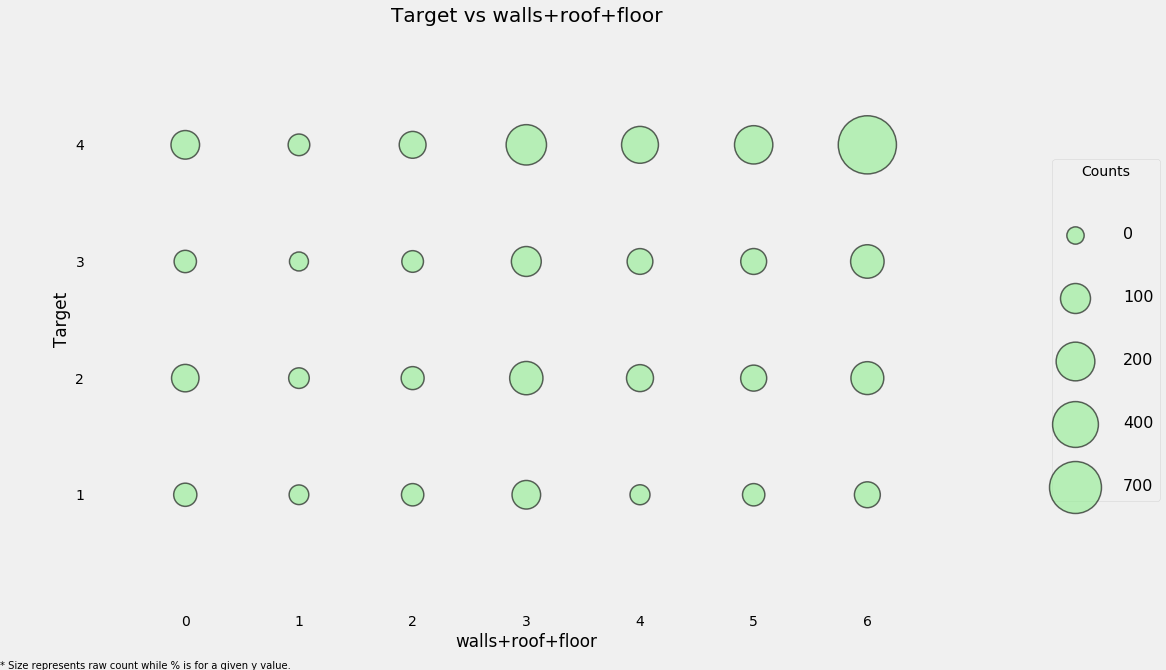

In [162]:
# Create new feature -> 기존 데이터에서 완전히 새로운 특성 만들기 'Feature Costruction'
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']
plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)


이 new feature(`wall+roof+floor`)은 **Target 4(취약 계층과 거리가 먼 Target)가 'house quality'변수 값에 더 높은 경향**
이 있기 때문에 유용 할 수 있습니다. 세분화 된 세부 정보를 얻기 위해 표에서 이것을 볼 수도 있습니다.

In [163]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target']
                      .value_counts(normalize = True)).rename(columns = {'Target': 'Normalized Count'}).reset_index()
counts.head()

walls+roof+floor  Target  Normalized Count
0                 0     4.0          0.376404
1                 0     2.0          0.320225
2                 0     1.0          0.162921
3                 0     3.0          0.140449
4                 1     4.0          0.323529

In [164]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True))
counts

Target
walls+roof+floor Target          
0                4.0     0.376404
                 2.0     0.320225
                 1.0     0.162921
                 3.0     0.140449
1                4.0     0.323529
                 2.0     0.264706
                 1.0     0.220588
                 3.0     0.191176
2                4.0     0.409449
                 2.0     0.220472
                 1.0     0.196850
                 3.0     0.173228
3                4.0     0.496269
                 2.0     0.229478
                 3.0     0.149254
                 1.0     0.125000
4                4.0     0.620805
                 2.0     0.177852
                 3.0     0.147651
                 1.0     0.053691
5                4.0     0.650602
                 2.0     0.138554
                 3.0     0.135542
                 1.0     0.075301
6                4.0     0.799163
                 3.0     0.087866
                 2.0     0.081590
                 1.0     0.031381

다음 변수는 `집의 품질에 대한 경고`입니다. 
음수 값으로, **화장실, 전기, 바닥, 수도 및 천장이없는 경우** 각각 **`-1 점`** 입니다.

In [165]:
# No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1'] + (heads['elec'] == 0) + heads['pisonotiene'] + 
                         heads['abastaguano'] + (heads['cielorazo'] == 0))

In [166]:
heads['sanitario1'].value_counts()

0    10266
1       41
Name: sanitario1, dtype: int64

In [167]:
heads['warning']

0        0
1        0
2        0
5        0
8        0
        ..
33393    2
33398    1
33400    1
33404    1
33409    1
Name: warning, Length: 10307, dtype: int64

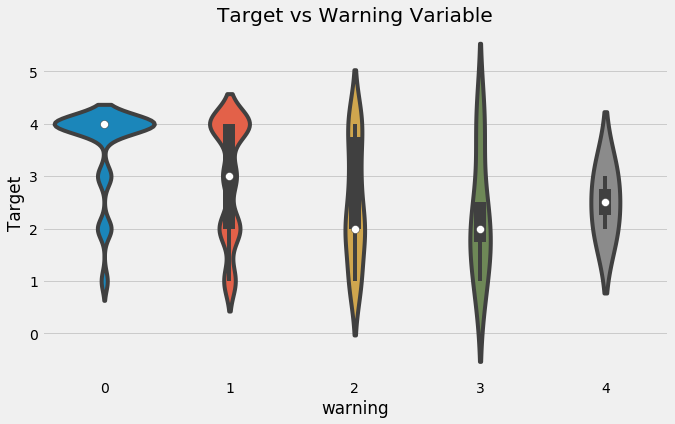

In [168]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'warning', y = 'Target', data = heads);
plt.title('Target vs Warning Variable');

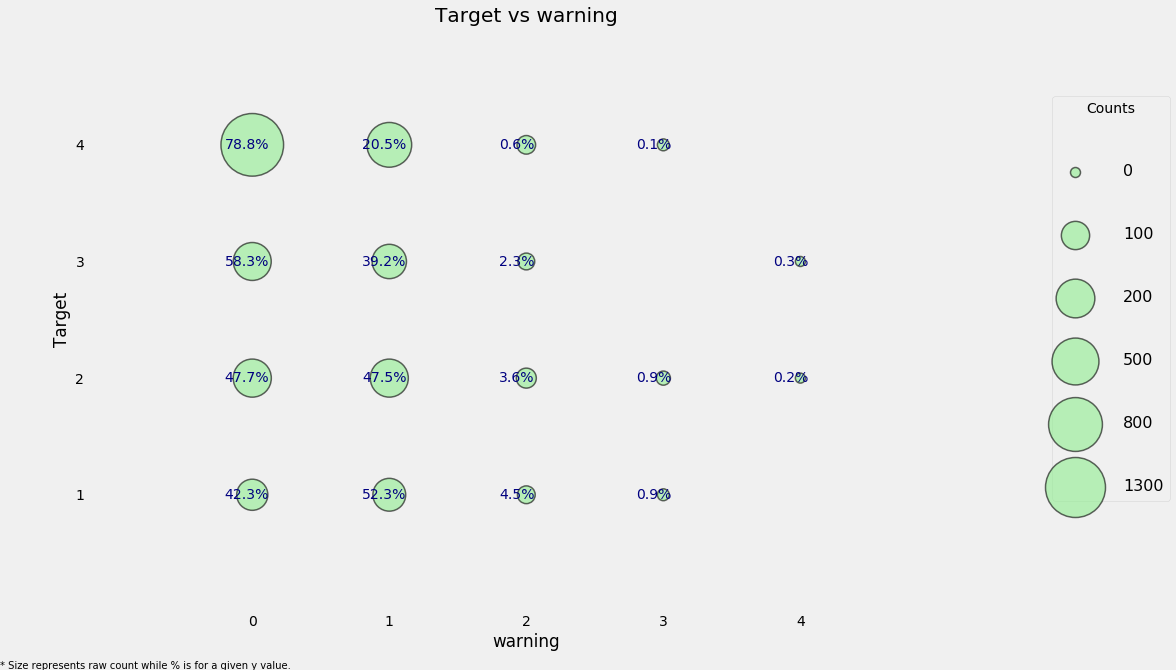

In [169]:
plot_categoricals('warning', 'Target', data = heads)

이 그래프만 보면,,, warning이 낮을 수록 더 잘살음,,, 근데 집 퀄이 좋을 수로 warning 높아야하지 않나???  
  
violinplot은 대상이 실제보다 더 작고 더 큰 값을 취할 수있는 것처럼 보이는 효과로 범주 형 변수를 부드럽게하기 때문에 여기에서 좋지 않습니다. 그럼에도 불구하고 우리는 경고 징후가 없고 빈곤 수준이 가장 낮은 가구가 집중되어 있음을 볼 수 있습니다. 
이것은 유용한 기능인 것처럼 보이지만 모델링에 도달 할 때까지 확실하게 알 수 없습니다!

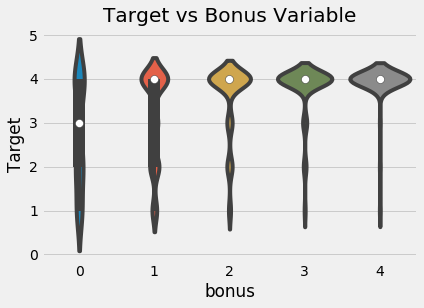

In [170]:
# 집 퀄리티를 보여주는 'bonus'칼럼 : refrigerator, computer, tablet, and television 으로 만든 새 칼럼
heads['bonus'] = 1 * (heads['refrig'] +  heads['computer'] +(heads['v18q1'] > 0) + heads['television'])

sns.violinplot('bonus', 'Target', data = heads, figsize = (10, 6));
plt.title('Target vs Bonus Variable');

## Per Capita Features

가정의 각 개인에 대한 특정 측정 수를 계산할 수있는 추가 feature 칼럼 생성하기

In [171]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

## Exploring Household Variables (가계 변수 탐색)

### Measuring Relationships

<두 변수 간의 관계를 측정하는 방법>  
  
  1. 피어슨 상관 관계 : -1에서 1로 두 변수 간의 선형 관계 측정
  2. Spearman 상관 관계 : -1에서 1로 두 변수 간의 단조로운 관계 측정
    
Spearman 상관 관계는 관계가 선형이 아니더라도 한 변수가 증가하는데 다른 변수도 증가하면 1입니다.   
반면에 Pearson 상관은 증가가 정확히 선형 인 경우에만 1 일 수 있습니다. 이것들은 예를 통해 가장 잘 설명됩니다.


In [172]:
from scipy.stats import spearmanr

In [173]:
# 관계를 보여주는 plot그리는 함수 만들기(피어슨,스피어만 둘다)
def plot_corrs(x, y):
    """Plot data and show the spearman and pearson correlation."""
    
    # Calculate correlations
    spr = spearmanr(x, y).correlation
    pcr = np.corrcoef(x, y)[0, 1]
    
    # Scatter plot
    data = pd.DataFrame({'x': x, 'y': y})
    plt.figure( figsize = (6, 4))
    sns.regplot('x', 'y', data = data, fit_reg = False);
    plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');

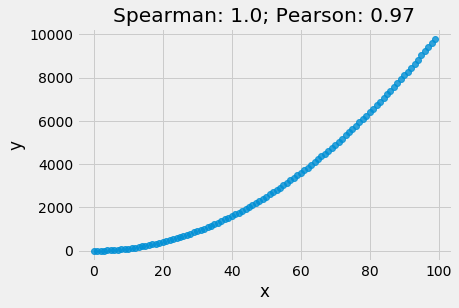

In [174]:
x = np.array(range(100))
y = x ** 2

plot_corrs(x, y)


Spearman 상관 관계는 종종 목표 또는 교육 연수와 같은 순서 형 변수에 대해 더 나은 것으로 간주됩니다.  
현실 세계에서 **대부분의 관계식은 선형이 아니며, Pearson 상관 관계는 두 변수가 얼마나 관련되어 있는지에 대한 근사치 일 수 있지만 정확하지 않으며 최상의 비교 방법은 아닙니다.**

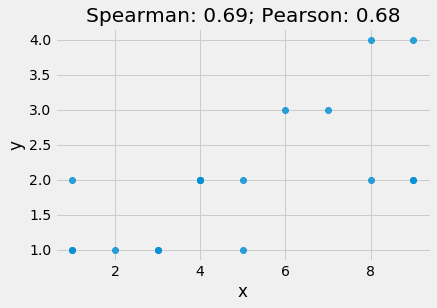

In [175]:
# 이런 경우에 두 관계 게수는 값이 유사
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

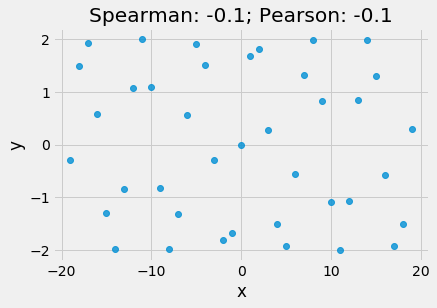

In [176]:
x = np.array(range(-19, 20))
y = 2 * np.sin(x)

plot_corrs(x, y)


먼저 모든 변수`Variable`과 `Target`간의  Pearson 상관 관계를 계산합니다.

In [177]:
# train 데이터만 사용
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

# Target과의 상관성을 보기
pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

Most positively correlated variables:
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000


In [178]:
train_heads.corr()

Target    hacdor    hacapo      v14a    refrig  \
Target              1.000000 -0.136275 -0.096313  0.068230  0.119607   
hacdor             -0.136275  1.000000  0.624324 -0.143713 -0.055073   
hacapo             -0.096313  0.624324  1.000000 -0.154749 -0.062110   
v14a                0.068230 -0.143713 -0.154749  1.000000  0.192954   
refrig              0.119607 -0.055073 -0.062110  0.192954  1.000000   
...                      ...       ...       ...       ...       ...   
bonus               0.279948 -0.083095 -0.074676  0.091532  0.361890   
phones-per-capita   0.299026 -0.146617 -0.109116  0.064706  0.118001   
tablets-per-capita  0.204638 -0.057825 -0.046797  0.013562  0.065339   
rooms-per-capita    0.152185 -0.173315 -0.144543  0.048376  0.023399   
rent-per-capita     0.159568 -0.032509 -0.027853  0.017918  0.025333   

                    paredblolad  paredzocalo  paredpreb  pisocemento  \
Target                 0.254469    -0.078851  -0.104545    -0.209131   
hacdor                -0.105112     0.053262  -0.021422     0.060396   
hacapo                -0.092562     0.036795  -0.020661     0.062616   
v14a                   0.075308    -0.011317   0.001342    -0.015043   
refrig                 0.132905    -0.047555   0.019826    -0.077232   
...                         ...          ...        ...          ...   
bonus                  0.239420    -0.095421  -0.083165    -0.219813   
phones-per-capita      0.139101    -0.053466  -0.035011    -0.087704   
tablets-per-capita     0.171787    -0.062273  -0.098910    -0.151729   
rooms-per-capita       0.139040    -0.011870  -0.102068    -0.128389   
rent-per-capita        0.126853    -0.043853  -0.066067    -0.118070   

                    pareddes  paredmad  paredzinc  paredfibras  paredother  \
Target             -0.096893 -0.152979  -0.040128    -0.039861    0.005231   
hacdor              0.139910  0.072131   0.101985    -0.006039   -0.005401   
hacapo              0.124520  0.066715   0.111904    -0.004544   -0.004064   
v14a               -0.188425 -0.057004   0.007657     0.003113    0.002784   
refrig             -0.135424 -0.134043  -0.056640     0.009158    0.008190   
...                      ...       ...        ...          ...         ...   
bonus              -0.072326 -0.151094  -0.044492     0.013172   -0.023531   
phones-per-capita  -0.091512 -0.086893  -0.024528    -0.024765   -0.020355   
tablets-per-capita -0.037938 -0.073818  -0.013411    -0.005946   -0.015916   
rooms-per-capita   -0.079480 -0.037523  -0.065698     0.002315    0.008434   
rent-per-capita    -0.021684 -0.071594  -0.008904    -0.011623   -0.007986   

                    pisomoscer  pisoother  pisonatur  pisonotiene  pisomadera  \
Target                0.275452   0.016832  -0.054463    -0.114144   -0.103487   
hacdor               -0.130923  -0.003818   0.068883     0.191171    0.045614   
hacapo               -0.124567  -0.002873  -0.003519     0.206423    0.032552   
v14a                  0.098117   0.001968  -0.138091    -0.070795   -0.105688   
refrig                0.169081   0.005789  -0.042751    -0.115489   -0.125656   
...                        ...        ...        ...          ...         ...   
bonus                 0.270870   0.014566  -0.033115    -0.080149   -0.095341   
phones-per-capita     0.137400  -0.016922  -0.027453    -0.093005   -0.060020   
tablets-per-capita    0.167687   0.002797  -0.013782    -0.044477   -0.035745   
rooms-per-capita      0.161028  -0.016529  -0.023614    -0.098968   -0.034086   
rent-per-capita       0.130448  -0.010448        NaN    -0.033093   -0.031293   

                    techozinc  techoentrepiso  techocane  techootro  \
Target               0.014357        0.032872  -0.026240   0.031516   
hacdor              -0.037777       -0.021824  -0.008108  -0.007148   
hacapo              -0.048015       -0.016422  -0.006101  -0.005379   
v14a                 0.085378        0.011248   0.004179   0.003684   
refrig               0.0291

- <음의 상관 관계의 경우>   
: 변수(`Variable`)가 증가함에 따라 `Target`이 감소하여 빈곤 심각도가 증가 함을 나타냅니다.    
**`warning`이 증가할수록 `poverty level(빈곤 수준)`도 증가, 즉 `Target`은 감소!** 합니다.   
이는 주택에 대한 잠재적인 나쁜 징후를 보여주기위한 것이기 때문에 의미가 있습니다. 
`hogar_nin`은 가족 중 0 ~ 19 세 자녀의 수이며 이는 또한 의미가 있습니다.   
-> 어린 자녀는 가족에게 스트레스를주는 재정적 원천이되어 빈곤 수준을 높일 수 있습니다.  
**(`hogar_nin`이 증가 -> `Target`감소, 더 빈곤)**  
또는 사회 경제적 지위가 낮은 가정은 그들 중 하나가 성공할 수 있기를 바라면서 더 많은 자녀를 낳습니다.   
설명이 어떻든간에 가족 규모와 빈곤 사이에는 실질적인 연관성이 있습니다.
  
    
      
- <양의 상관 관계의 경우>  
: 변수(`Variable`)이 높을수록 `Target` 값이 높아, 빈곤 심각도가 감소함을 의미합니다.  
가장 연관성이 높은 가구 수준 변수는 가구 내 성인의 평균 교육 수준 인 `meaneduc`입니다.   
교육과 빈곤의 관계는 직관적으로 의미가 있습니다. **교육 수준이 높을수록 빈곤 수준이 낮습니다.**   
우리는 어떤 원인이 무엇인지 반드시 알 수는 없지만, 이것이 같은 방향으로 움직이는 경향이 있다는 것을 알고 있습니다.

In [179]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

# 칼럼 단위로 반복
for c in heads:
    # 데이터 타입 -> float or int 이어야함!
    if heads[c].dtype != 'object':
        feats.append(c)
        
        # spearman correlation 계산
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')


Spearman 상관 계수 계산에는 관계의 유의 수준을 나타내는 pvalue도 함께 제공됩니다.   
0.05 미만의 p 값은 일반적으로 유의미한 것으로 간주되지만 다중 비교를 수행하기 때문에 p- 값을 Bonferroni 보정이라고하는 프로세스 인 비교 수로 나누려고합니다.

In [180]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


In [181]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

feature     pcorr     scorr        pvalue      diff
77    rooms-per-capita  0.152185  0.223303  6.521453e-35 -0.071119
85               v18q1  0.197493  0.244200  1.282664e-41 -0.046708
87  tablets-per-capita  0.204638  0.248642  3.951568e-43 -0.044004
2                 r4t1 -0.260917 -0.219226  1.112230e-33 -0.041691
97   phones-per-capita  0.299026  0.337377  4.760104e-80 -0.038351

In [182]:
corrs.sort_values('diff').dropna().tail()

feature     pcorr     scorr        pvalue      diff
57    techozinc  0.014357  0.003404  8.528369e-01  0.010954
49  hogar_mayor -0.025173 -0.041722  2.290994e-02  0.016549
88       edjefe  0.235687  0.214736  2.367521e-32  0.020951
66       edjefa  0.052310  0.005114  7.804715e-01  0.047197
17   dependency -0.126465 -0.281516  2.792620e-55  0.155051

상관 관계에서 가장 큰 불일치는 `dependency`(종속성)입니다.   
관계를 시각화하기 위해 `Target` 과  `dependency`종속성의 산점도를 만들 수 있습니다.  
둘 다 이산 변수이기 때문에 플롯에 약간의 지터? jitter? 를 추가 할 것입니다.

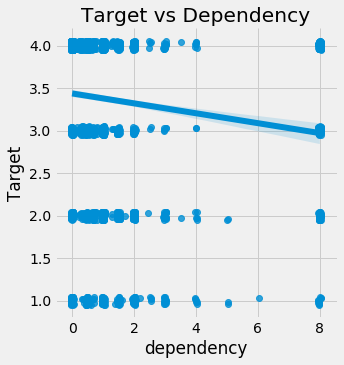

In [183]:
sns.lmplot('dependency', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Dependency');

관계를 보기는 어렵지만,,, 약간 부정적입니다.   
**`dependency`종속성이 증가하면 `Target`의 값이 감소합니다.**   
의존성(`dependency`) :  부양 가족의 수/부양자의 수   
이 값을 높이면 빈곤 심각도가 증가하는 경향이 있습니다.   
부양 가족 (일반적으로 일하지 않는)이 많을수록 부양 가족의 지원을 받아야하기 때문에 빈곤 수준이 높아집니다.

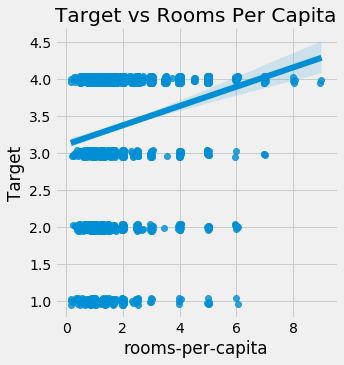

In [184]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Rooms Per Capita');

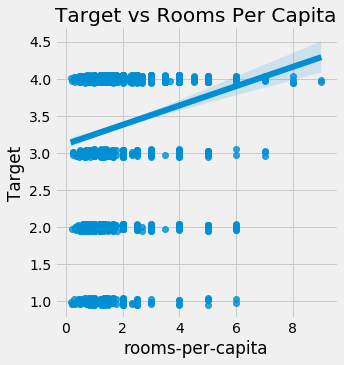

In [185]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg = True, data = train_heads, y_jitter=0.05);
plt.title('Target vs Rooms Per Capita');

### Correlation Heatmap

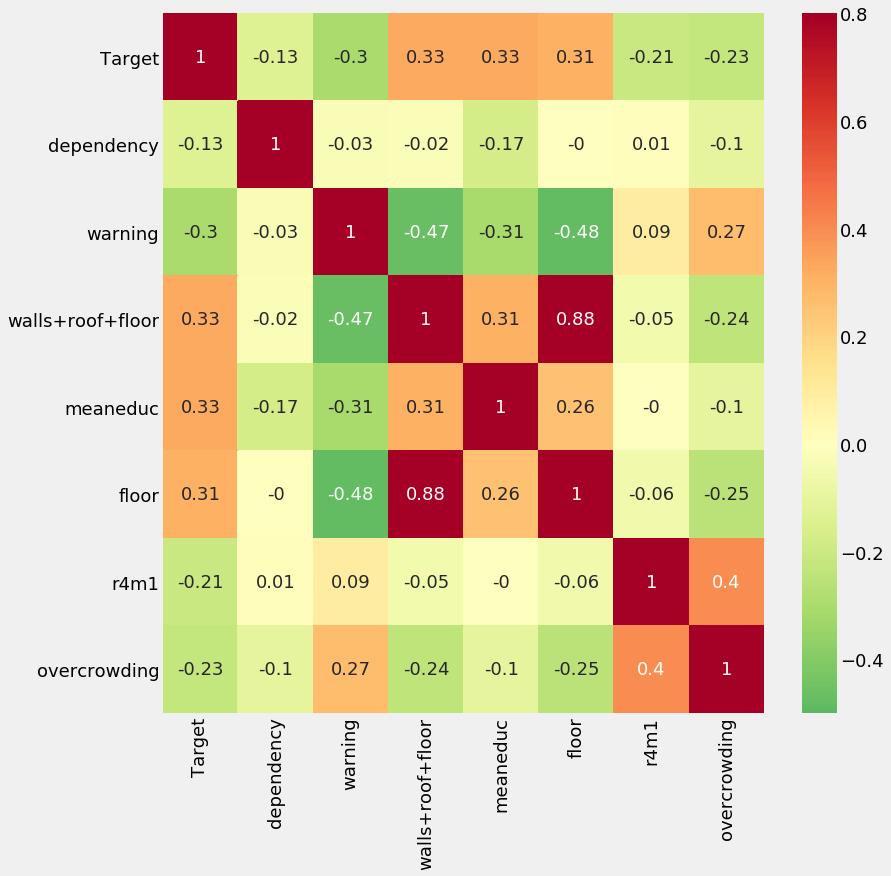

In [186]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']

# 상관관계 계산.
corr_mat = train_heads[variables].corr().round(2)    # round(2)는 소수점 2자리까지 반올림

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0,  
            cmap = plt.cm.RdYlGn_r, annot = True);           # vmin & vmax : colorbar의 최소값과 최대값을 조정.

**이 도표는 `Target`과 약한 상관 관계를 가진 변수가 많다는 것**을 보여줍니다.   
또한 **공선성으로 인해 문제를 일으킬 수있는 일부 변수 (예 : `floor` 및 `walls+roof+floor`)간에 높은 상관 관계가 있습니다.**

## Features Plot

가구 수준 데이터의 최종 탐색을 위해 Target과 가장 상관 관계가있는 변수 중 일부를 plot 할 수 있습니다.  
  
  
이것은 `scatterplots on the upper triangle`, `kernel density estimate (kde) plots`, `2D KDE plots on the lower triangle`을 보여줍니다.

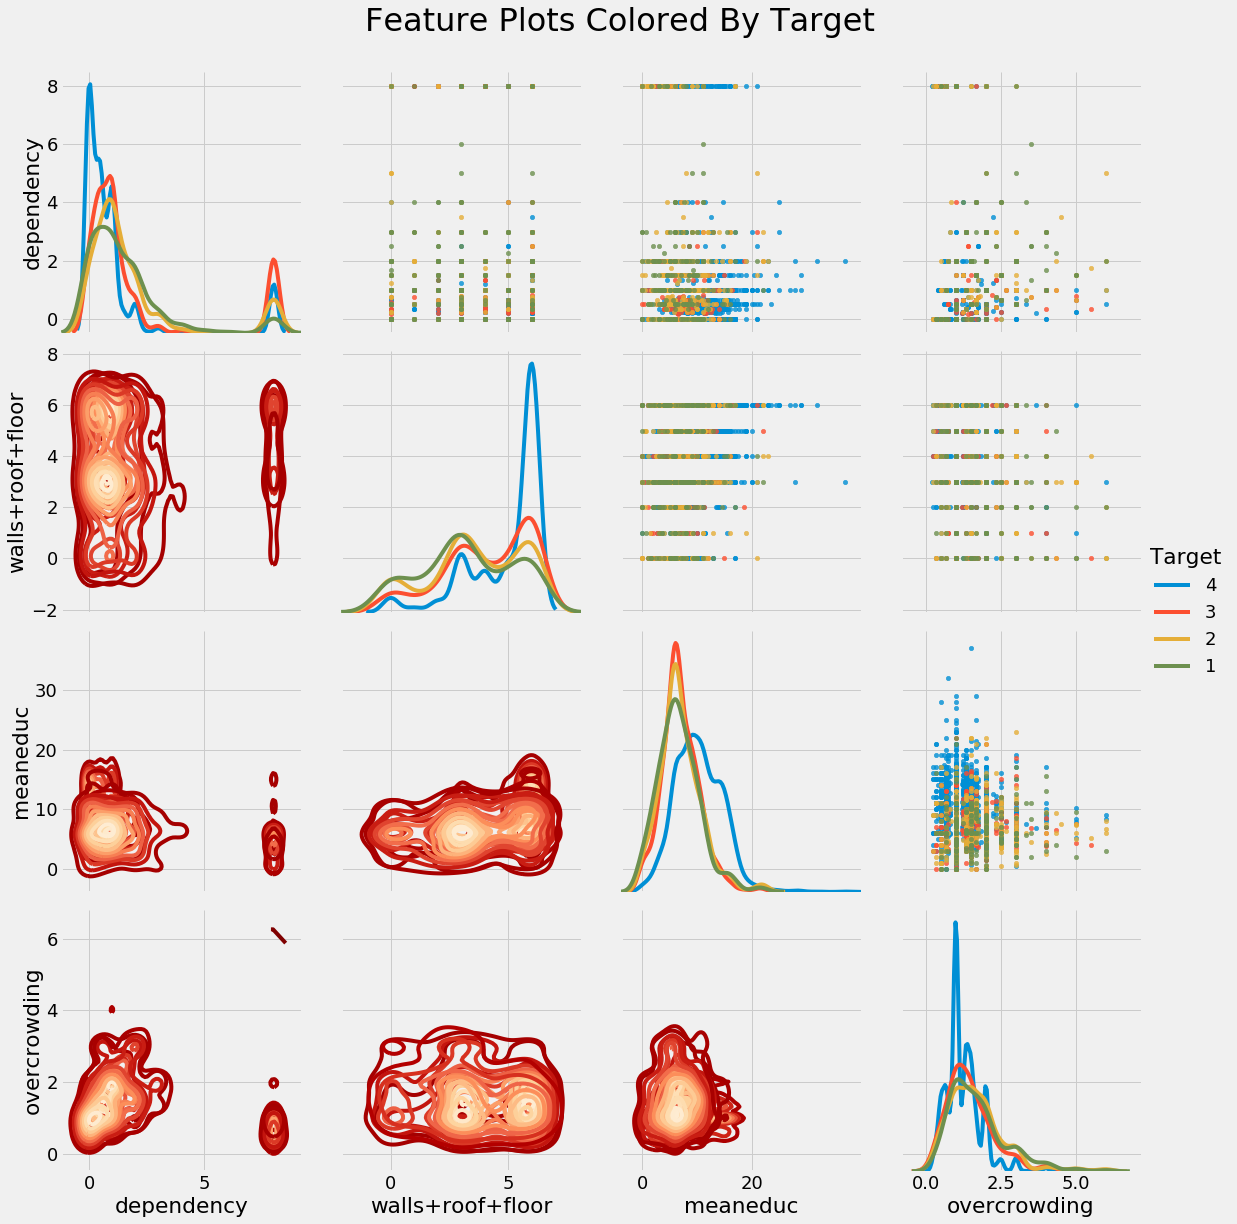

In [187]:
import warnings
warnings.filterwarnings('ignore')

# plot을 만들 데이터 선정
plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor', 'meaneduc', 'overcrowding']]

# 시각화 기본 판 제작
grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False,
                    hue = 'Target', hue_order = [4, 3, 2, 1], 
                    vars = [x for x in list(plot_data.columns) if x != 'Target'])

# Upper is a scatter plot (위 삼각형 산점도)
grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

# Diagonal is a histogram (대각선 kdeplot)
grid.map_diag(sns.kdeplot)

# Bottom is density plot (아래 삼각형 2D kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);

In [188]:
household_feats = list(heads.columns)
household_feats

['Id',
 'idhogar',
 'Target',
 'hacdor',
 'hacapo',
 'v14a',
 'refrig',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pisocemento',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'public',
 'planpri',
 'noelec',
 'coopele',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'epared1',
 'epared2',
 'epared3',
 'eviv1',
 'eviv2',
 'eviv3',
 'tipovivi1',
 'tipovivi2',
 'tipovivi3',
 'tipovivi4',
 'tipovivi5',
 'computer',
 'television',
 'lugar1',
 'lugar2',
 'lugar3',
 'lugar4',
 'lugar5',
 'lugar6',
 'area1',
 'v2a1-missing',
 'v2a1',
 'dependency',
 'edjefe',
 'edjefa',
 'meaneduc'

## Individual Level Variables

**개별 수준 변수에는 boolean(True 또는 False의 경우 1 또는 0)과 ordinal(의미있는 순서가있는 이산 값)의 두 가지 유형이 있습니다.**



In [189]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

### Redundant Individual Variables (중복 개별 변수)

중복 된 개별 변수를 식별하기 위해 `household level variables`로했던 것과 동일한 프로세스를 수행 할 수 있습니다.   
상관 계수의 절대 크기가 0.95보다 큰 모든 변수에 초점을 맞출 것입니다.

In [190]:
# 상관관계 행렬 생성
corr_matrix = ind.corr()

# 상관행렬의 윗 삼각형 선택
# np.triu : upper triangle 
# k 번째 대각선 아래의 요소가 0 인 행렬의 복사본을 반환합니다.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 상관관계가 0.95 보다 큰 칼럼 인덱스 반환
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [191]:
ind = ind.drop(columns = 'male')

### Creating Ordinal Variables (순서형 변수 만들기)

`household level data` 에서 했던 것처럼 기존 열을 서수 변수에 매핑 할 수 있습니다.   
여기에서는   
`instlevel1` : 교육 수준 없음   
`instlevel9` : 대학원 교육 

**개인의 교육 정도를 나타내는 `instlevel_` 변수에 초점을 맞출 것입니다.**

In [192]:
ind

Id    idhogar  Target  v18q  dis  female  estadocivil1  \
0      ID_279628684  21eb7fcc1     4.0     0    0       0             0   
1      ID_f29eb3ddd  0e5d7a658     4.0     1    0       0             0   
2      ID_68de51c94  2c7317ea8     4.0     0    1       1             0   
3      ID_d671db89c  2b58d945f     4.0     1    0       0             0   
4      ID_d56d6f5f5  2b58d945f     4.0     1    0       1             0   
...             ...        ...     ...   ...  ...     ...           ...   
33408  ID_a065a7cad  3aa78c56b     NaN     0    0       1             0   
33409  ID_1a7c6953b  d237404b6     NaN     0    0       0             0   
33410  ID_07dbb4be2  d237404b6     NaN     0    1       1             0   
33411  ID_34d2ed046  d237404b6     NaN     0    0       1             0   
33412  ID_34754556f  d237404b6     NaN     0    0       1             0   

       estadocivil2  estadocivil3  estadocivil4  estadocivil5  estadocivil6  \
0                 0             0             1             0             0   
1                 0             0             1             0             0   
2                 0             0             0             0             1   
3                 0             0             0             0             0   
4                 1             0             0             0             0   
...             ...           ...           ...           ...           ...   
33408             0             0             0             0             0   
33409             1             0             0             0             0   
33410             0             0             0             0             0   
33411             0             0             0             0             0   
33412             1             0             0             0             0   

       estadocivil7  parentesco1  parentesco2  parentesco3  parentesco4  \
0                 0            1            0            0            0   
1                 0            1            0            0            0   
2                 0            1            0            0            0   
3                 1            0            0            1            0   
4                 0            0            1            0            0   
...             ...          ...          ...          ...          ...   
33408             1            0            0            1            0   
33409             0            1            0            0            0   
33410             1            0            0            1            0   
33411             1            0            0            1            0   
33412             0            0            1            0            0   

       parentesco5  parentesco6  parentesco7  parentesco8  parentesco9  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
33408            0            0            0            0            0   
33409            0            0            0            0            0   
33410            0            0            0            0            0   
33411            0            0            0            0            0   
33412            0            0            0            0            0   

       parentesco10  parentesco11  parentesco12  instlevel1  instlevel2  \
0                 0             0             0           0           0   
1                 0             0             0           0           0   
2                 0             0             0           0           0   
3                 0             0             0           0           0   
4 

In [193]:
ind[[c for c in ind if c.startswith('instl')]].head()

instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
0           0           0           0           1           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           1           0   
3           0           0           0           1           0           0   
4           0           0           0           0           1           0   

   instlevel7  instlevel8  instlevel9  
0           0           0           0  
1           0           1           0  
2           0           0           0  
3           0           0           0  
4           0           0           0

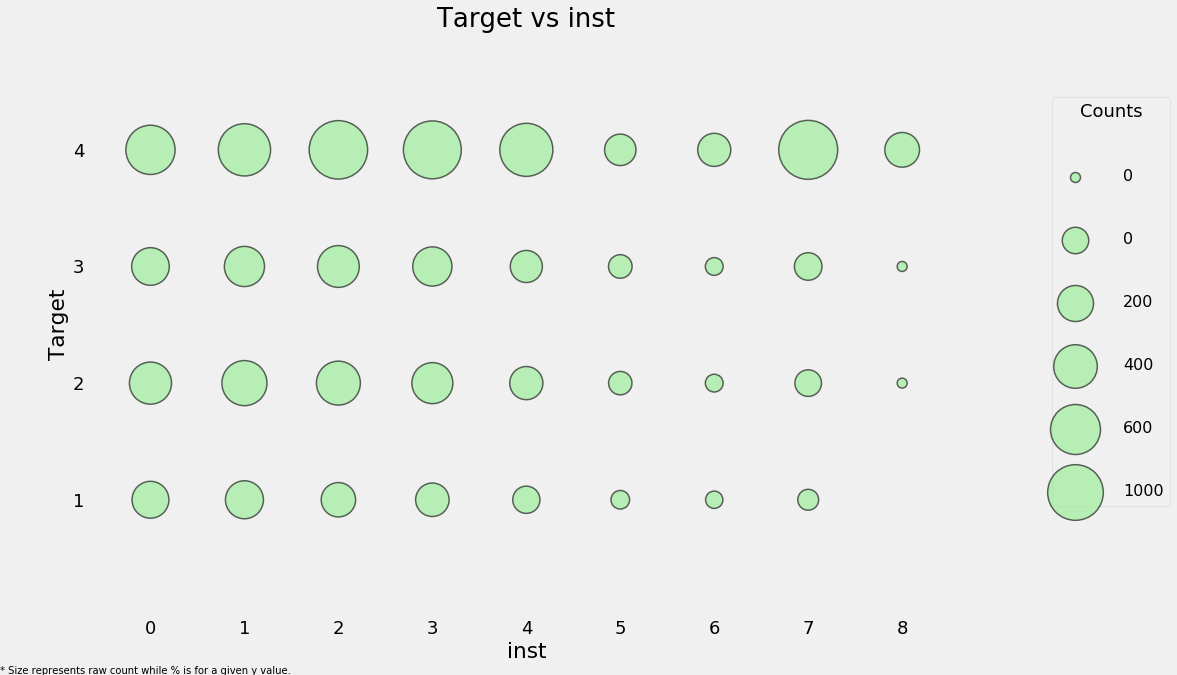

In [194]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)
# np.argmax(a, axis) : a 배열에서 가장 큰 값을 반환, axis=1이니까 행별로 수행 

plot_categoricals('inst', 'Target', ind, annotate = False);

In [195]:
np.array(ind[[c for c in ind if c.startswith('instl')]])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [196]:
ind['inst']

0        3
1        7
2        4
3        3
4        4
        ..
33408    1
33409    2
33410    1
33411    1
33412    2
Name: inst, Length: 33413, dtype: int64

교육 수준이 높을 수록, 빈곤 수준은 낮아짐!!  
우리는 이것이 개인 수준이라는 것을 명심할 필요가 있으며 결국이 데이터를 가정 수준에서 집계해야 할 것입니다.

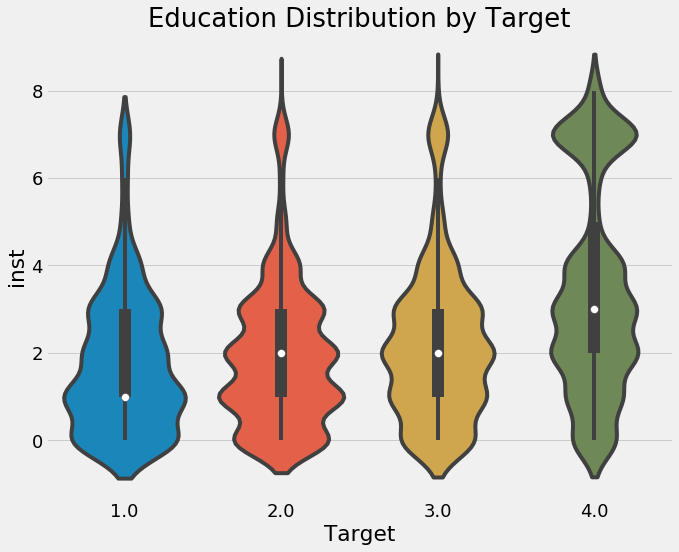

In [197]:
plt.figure(figsize = (10, 8))
sns.violinplot(x = 'Target', y = 'inst', data = ind);
plt.title('Education Distribution by Target');

In [198]:
# Drop the education columns
# ind = ind.drop(columns = [c for c in ind if c.startswith('instlevel')])
ind.shape

(33413, 40)

### Feature Construction

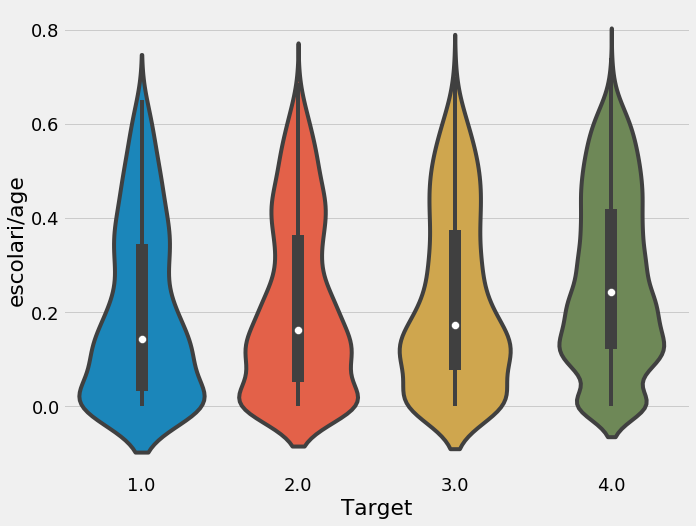

In [199]:
ind['escolari/age'] = ind['escolari'] / ind['age']

plt.figure(figsize = (10, 8))
sns.violinplot('Target', 'escolari/age', data = ind);

In [200]:
ind['inst/age'] = ind['inst'] / ind['age']      # 학력수준 / 나이
ind['tech'] = ind['v18q'] + ind['mobilephone']  # 태블릿이나 휴대폰 소지
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

### Feature Engineering through Aggregations(집계를 통한 엔지니어링)

**개별 데이터를 가구 데이터에 통합하려면 각 가구에 대해 집계해야합니다.**   
이를 수행하는 가장 간단한 방법은   
**가족 ID idhogar로 그룹화 한 다음 데이터를 집계하는 것**입니다.   
순서가있는 변수 또는 연속 변수에 대한 집계의 경우 6 개를 사용할 수 있습니다.이 중 5 개는 팬더에 내장되어 있고 그중 하나는 자체적으로 range_를 정의합니다. 부울 집계는 동일 할 수 있지만 이렇게하면 삭제해야하는 중복 열이 많이 생성됩니다. 이 경우 동일한 집계를 사용한 다음 다시 돌아가 중복 열을 삭제합니다.

In [201]:
# Define custom function
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

# Group and aggregate
ind_agg = ind.drop(columns = 'Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   

          female                                estadocivil1                \
             min max sum count       std range_          min max sum count   
idhogar                                                                      
000a08204      0   1   1     3  0.577350      1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107      1            0   0   0     2   
001845fb0      0   1   2     4  0.577350      1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000      0            0   1   1     2   
003123ec2      0   1   1     4  0.500000      1            0   1   2     4   

                           estadocivil2                                \
                std range_          min max sum count      std range_   
idhogar                                                                 
000a08204  0.577350      1            0   1   2     3  0.57735      1   
000bce7c4  0.000000      0            0   0   0     2  0.00000      0   
001845fb0  0.000000      0            0   1   2     4  0.57735      1   
001ff74ca  0.707107      1            0   0   0     2  0.00000      0   
003123ec2  0.577350      1            0   1   2     4  0.57735      1   

          estadocivil3                           estadocivil4                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            1   1   2     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                      estadocivil5                                 \
           std range_          min max sum count       std range_   
idhogar                                                             
000a08204  0.0      0            0   0   0     3  0.000000      0   
000bce7c4  0.0      0            0   0   0     2  0.000000      0   
001845fb0  0.0      0            0   0   0     4  0.000000      0   
001ff74ca  0.0      0            0   1   1     2  0.707107      1   
003123ec2  0.0      0            0   0   0     4  0.000000      0   

          estadocivil6                           estadocivil7                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   1   2     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                          parentesco1                                 \
               std range_         min max sum count       std range_   
idhogar                                                                
000a08204  0.00000      0           0   1   1     3  0.577350      1   
000bce7c4  0.00000      0           0   1   1     2  0.70710

In [202]:
# 칼럼명 세팅 다시
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count   dis-std  dis-range_  \
idhogar                                                                 
000a08204        0        0        0          3  0.000000           0   
000bce7c4        0        1        1          2  0.707107           1   
001845fb0        0        0        0          4  0.000000           0   
001ff74ca        0        0        0          2  0.000000           0   
003123ec2        0        0        0          4  0.000000           0   

           female-min  female-max  female-sum  female-count  female-std  \
idhogar                                                                   
000a08204           0           1           1             3    0.577350   
000bce7c4           0           1           1             2    0.707107   
001845fb0           0           1           2             4    0.577350   
001ff74ca           1           1           2             2    0.000000   
003123ec2           0           1           1             4    0.500000   

           female-range_  estadocivil1-min  estadocivil1-max  \
idhogar                                                        
000a08204              1                 0                 1   
000bce7c4              1                 0                 0   
001845fb0              1                 0                 0   
001ff74ca              0                 0                 1   
003123ec2              1                 0                 1   

           estadocivil1-sum  estadocivil1-count  estadocivil1-std  \
idhogar                                                             
000a08204                 1                   3          0.577350   
000bce7c4                 0                   2          0.000000   
001845fb0                 0                   4          0.000000   
001ff74ca                 1                   2          0.707107   
003123ec2                 2                   4          0.577350   

           estadocivil1-range_  estadocivil2-min  estadocivil2-max  \
idhogar                                                              
000a08204                    1                 0                 1   
000bce7c4                    0                 0                 0   
001845fb0                    0                 0                 1   
001ff74ca                    1                 0                 0   
003123ec2                    1                 0                 1   

           estadocivil2-sum  estadocivil2-count  estadocivil2-std  \
idhogar                                                             
000a08204                 2                   3           0.57735   
000bce7c4                 0                   2           0.00000   
001845fb0                 2                   4           0.57735   
001ff74ca                 0                   2           0.00000   
003123ec2                 2                   4           0.57735   

           estadocivil2-range_  estadocivil3-min  estadocivil3-max  \
idhogar                                                              
000a08204                    1                 0                 0   
000bce7c4                    0                 1                 1   
001845fb0                    1                 0                 0   
001ff74ca                    0                 0                 0   
003123ec2                    1                 0                 0   

           estadocivil3-sum

In [203]:
ind_agg.iloc[:, [0, 1, 2, 3, 6, 7, 8, 9]].head()

v18q-min  v18q-max  v18q-sum  v18q-count  dis-min  dis-max  \
idhogar                                                                 
000a08204         1         1         3           3        0        0   
000bce7c4         0         0         0           2        0        1   
001845fb0         0         0         0           4        0        0   
001ff74ca         1         1         2           2        0        0   
003123ec2         0         0         0           4        0        0   

           dis-sum  dis-count  
idhogar                        
000a08204        0          3  
000bce7c4        1          2  
001845fb0        0          4  
001ff74ca        0          2  
003123ec2        0          4

### Feature Selection

특성 선택의 첫 번째 라운드로 상관 관계가 0.95보다 큰 모든 변수 쌍에서 하나를 제거 할 수 있습니다

In [204]:
# 상관행렬 생성
corr_matrix = ind_agg.corr()

# 상관행렬의 위쪽 삼각형 지정
# np.triu : upper triangle 
# k 번째 대각선 아래의 요소가 0 인 행렬의 복사본을 반환합니다.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 111 correlated columns to remove.


매우 많은 칼럼을 삭제 한 다음 `heads` 데이터와 병합하여 최종 데이터 프레임을 만들기

In [205]:
ind_agg = ind_agg.drop(columns = to_drop)
ind_feats = list(ind_agg.columns)

# Merge on the household id
final = heads.merge(ind_agg, on = 'idhogar', how = 'left')

print('Final features shape: ', final.shape)

Final features shape:  (10307, 228)


In [206]:
# 최종데이터 완성
final.head()

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
3  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
4  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb  pisocemento  pareddes  paredmad  paredzinc  \
0            0          0            0         0         0          0   
1            0          0            0         0         1          0   
2            0          0            0         0         1          0   
3            0          0            0         0         0          0   
4            0          0            0         0         0          0   

   paredfibras  paredother  pisomoscer  pisoother  pisonatur  pisonotiene  \
0            0           0           1          0          0            0   
1            0           0           0          0          0            0   
2            0           0           1          0          0            0   
3            0           0           1          0          0            0   
4            0           0           1          0          0            0   

   pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  \
0           0          0               1          0          0          1   
1           1          1               0          0          0          1   
2           0          1               0          0          0          1   
3           0          1               0          0          0          1   
4           0          1               0          0          0          1   

   abastaguadentro  abastaguafuera  abastaguano  public  planpri  noelec  \
0                1               0            0       1        0       0   
1                1               0            0       1        0       0   
2                1               0            0       1        0       0   
3                1               0            0       1        0       0   
4                1               0            0       1        0       0   

   coopele  sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  \
0        0           0           1           0           0           0   
1        0           0           1           0           0           0   
2        0           0           1           0           0           0   
3        0           0           1           0           0           0   
4        0           0           1           0           0           0   

   energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  \
0              0              0              1              0          1   
1              0              1              0              0          1   
2              0              1              0              0          1   
3              0              1              0              0          1   
4              0              0              1              0          1   

   elimbasu2  elimbasu3  elimbasu4  elimbasu5  elimbasu6  epared1  epared2  \
0          0          0          0          0          0        0        1   
1          0          0          0          0          0        0        1   
2          0          0          0          0          0        0        1   
3          0          0          0          0          0        0        0   
4          0          0          0          0          0        1        0   

   epared3  eviv1  eviv2  eviv3  tipovivi1  tipovivi2  tipovivi3  tipovivi4  \
0        0      1      0      0          0          0          1          0   
1        0      0      1      0          0          0          1          0   
2        0      0      0      1          1          0          0          0   
3        1      0

## Final Data Exploration

In [207]:
corrs = final.corr()['Target']
corrs.sort_values().head()

warning          -0.301791
instlevel2-sum   -0.297868
instlevel1-sum   -0.271204
hogar_nin        -0.266309
r4t1             -0.260917
Name: Target, dtype: float64

In [208]:
corrs.sort_values().dropna().tail()

walls+roof+floor    0.332446
meaneduc            0.333652
inst-max            0.368229
escolari-max        0.373091
Target              1.000000
Name: Target, dtype: float64

우리가 만든 변수를 보면 `Target`과 꽤 상관관계가 있음

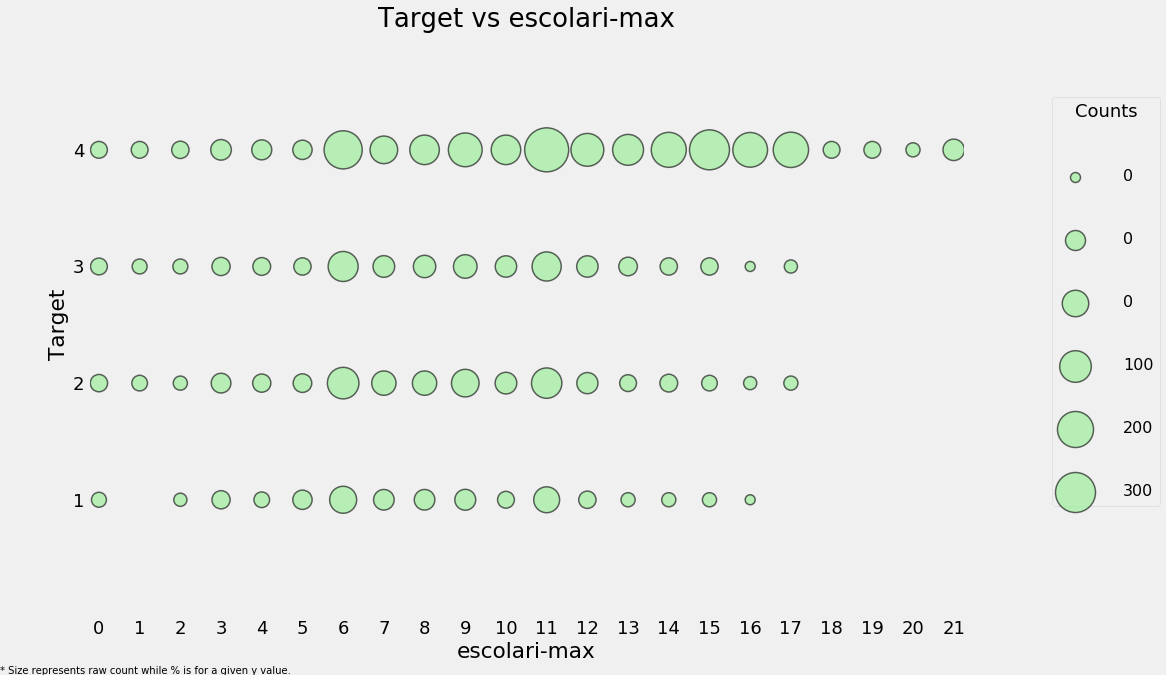

In [209]:
plot_categoricals('escolari-max', 'Target', final, annotate=False);

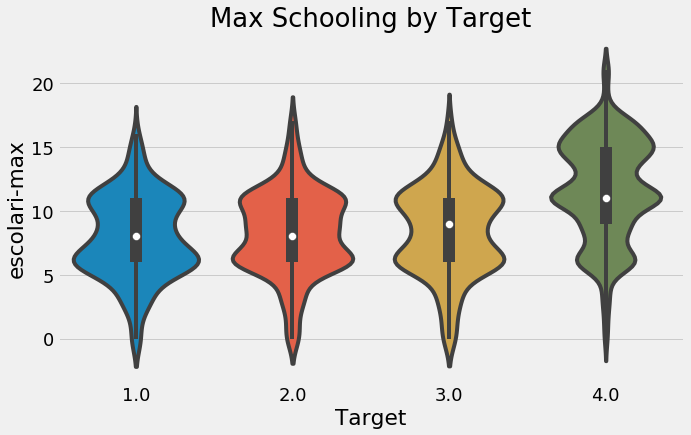

In [210]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Target', y = 'escolari-max', data = final);
plt.title('Max Schooling by Target');

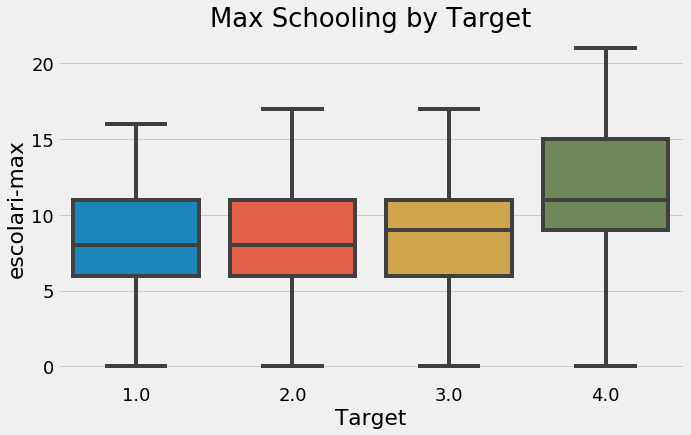

In [211]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'escolari-max', data = final);
plt.title('Max Schooling by Target');

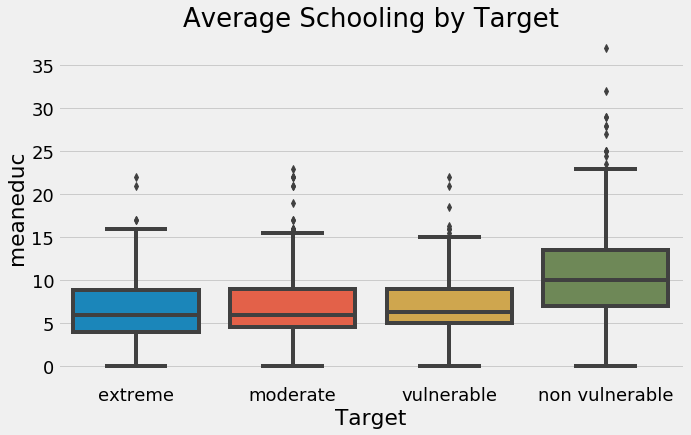

In [212]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'meaneduc', data = final);
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Average Schooling by Target');

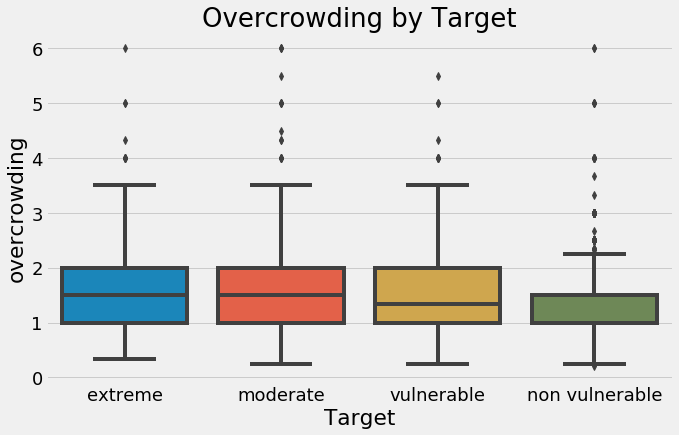

In [213]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'overcrowding', data = final);
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Overcrowding by Target');

유용 할 수있는 다른 기능 중 하나는 **세대주(가장)의 성별**입니다.   
데이터를 이미 집계 했으므로 개인 수준 데이터로 돌아가 가장의 성별을 찾아야합니다.

In [214]:
# 가장의 가구id,성별 데이터 조회
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
# 기존의 완성된 final 데이터와 결합
final = final.merge(head_gender, on = 'idhogar', how = 'left').rename(columns = {'female': 'female-head'})
final

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  \
0      ID_279628684  21eb7fcc1     4.0       0       0     1       1   
1      ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1   
2      ID_68de51c94  2c7317ea8     4.0       0       0     1       1   
3      ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1   
4      ID_1284f8aad  d6dae86b7     4.0       1       0     1       1   
...             ...        ...     ...     ...     ...   ...     ...   
10302  ID_265b917e8  e44cb9969     NaN       0       0     0       0   
10303  ID_19c0b1480  935a65ffa     NaN       0       0     1       1   
10304  ID_aa256c594  2edb6f51e     NaN       0       0     1       1   
10305  ID_4b7feead3  3aa78c56b     NaN       1       1     1       1   
10306  ID_1a7c6953b  d237404b6     NaN       0       0     1       1   

       paredblolad  paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
0                1            0          0            0         0         0   
1                0            0          0            0         0         1   
2                0            0          0            0         0         1   
3                1            0          0            0         0         0   
4                1            0          0            0         0         0   
...            ...          ...        ...          ...       ...       ...   
10302            0            0          0            0         0         1   
10303            0            0          0            1         0         1   
10304            0            0          0            1         0         1   
10305            0            0          0            1         0         1   
10306            0            0          1            1         0         0   

       paredzinc  paredfibras  paredother  pisomoscer  pisoother  pisonatur  \
0              0            0           0           1          0          0   
1              0            0           0           0          0          0   
2              0            0           0           1          0          0   
3              0            0           0           1          0          0   
4              0            0           0           1          0          0   
...          ...          ...         ...         ...        ...        ...   
10302          0            0           0           0          0          0   
10303          0            0           0           0          0          0   
10304          0            0           0           0          0          0   
10305          0            0           0           0          0          0   
10306          0            0           0           0          0          0   

       pisonotiene  pisomadera  techozinc  techoentrepiso  techocane  \
0                0           0          0               1          0   
1                0           1          1               0          0   
2                0           0          1               0          0   
3                0           0          1               0          0   
4                0           0          1               0          0   
...            ...         ...        ...             ...        ...   
10302            0           1          1               0          0   
10303            0           0          1               0          0   
10304            0           0          1               0          0   
10305            0           0          1               0          0   
10306            0           0          1               0          0   

       techootro  cielorazo  abastaguadentro  abastaguafuera  abastaguano  \
0              0          1                1               0            0   
1              0          1                1               0            0   
2              0          1                1               0            0   
3              0          1                1               0            0   
4   

In [215]:
final.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

**가장이 여성 인 가구는 가난 수준이 더 높다**

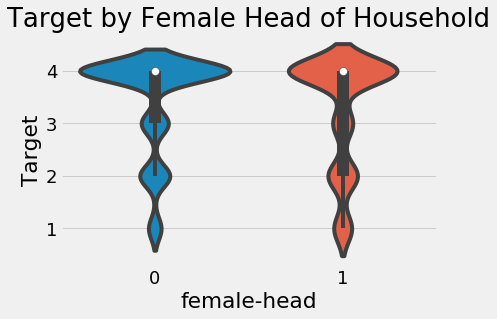

In [216]:
sns.violinplot(x = 'female-head', y = 'Target', data = final);
plt.title('Target by Female Head of Household');

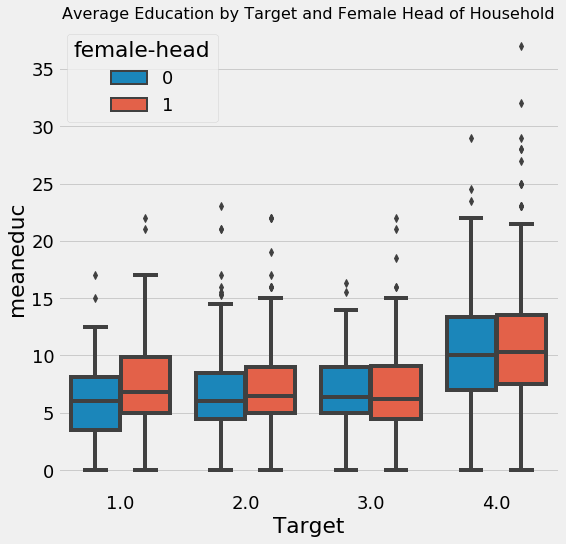

In [217]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Target', y = 'meaneduc', hue = 'female-head', data = final);
plt.title('Average Education by Target and Female Head of Household', size = 16);


`Target`의 모든 값에서 **여성 가장이있는 가구의 교육 수준이 더 높다.**   
**그러나 전반적으로 여성 가장이있는 가구가 심각한 빈곤에 처할 가능성이 더 높다.**

In [218]:
# 여기서도, 전반적으로 여성 가장이있는 가구의 평균 교육은 남성이있는 가구보다 약간 높다.
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

mean  count
female-head                 
0            8.968025   6384
1            9.237013   3903

# Machine Learning Modeling

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# 교차 검증을위한 사용자 지정 채점자 macro
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [220]:
# train 데이터의 Target 칼럼 ->  y_Train
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

# training data 추출
train_set = final[final['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns = ['Id', 'idhogar', 'Target'])

# 제출을 위한 베이스 생성
submission_base = test[['Id', 'idhogar']].copy()


In [221]:
# train 데이터의 칼럼명 리스트 만들기
features = list(train_set.columns)

# 파이프라인을 사용하면 데이터 사전 처리 및 분류의 모든 단계를 포함하는 단일 개체를 만들 수 있다.
pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),  # 모든 nan 값은 중앙값으로 채움
                      ('scaler', MinMaxScaler())])                     # 0~1값으로 정규화

# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

In [222]:
# 모델 : 랜덤 포레스트
model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs = -1)
# n_estimators : 결정트리의 갯수를 지정(Default = 10)
# random_state : 지정한 값에 따라 전혀 다른 트리가 만들어져 같은 결과를 만들어야 하면 고정해야함 
                        # (n_estimators로 만드는 트리 개수를 많이 지정하면 random_state값의 변화에 따른 변동이 적음)
# n_job : 사용할 코어 수 지정 가능(=-1로 지정하면 모든 코어 사용) 모델 만들 때 시간이 오래 걸리는 경우     


# 10 겹 교차검증 수행
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3439 with std = 0.0438


보시다시피,,,,, 결과 안 좋음,,,,,

## Feature Importances  

트리 기반 모델을 사용하면 모델에서 기능의 유용성에 대한 상대적 순위를 보여주는 기능 중요도를 볼 수 있습니다.   
이는 분할을 위해 변수를 사용한 노드에서 불순물 감소의 합계를 나타내지 만 절대 값에 많은주의를 기울일 필요가 없습니다.   
대신 상대 점수에 초점을 맞출 것입니다.

기능 중요도를 보려면 전체 학습 세트에 대해 모델을 학습해야합니다. 교차 유효성 검사는 기능 중요도를 반환하지 않습니다.


In [223]:
model.fit(train_set, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

feature  importance
0       hacdor    0.000643
1       hacapo    0.000283
2         v14a    0.000460
3       refrig    0.001798
4  paredblolad    0.006024

In [224]:
# Feature importance를 표시하는 데 사용할 함수

def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df


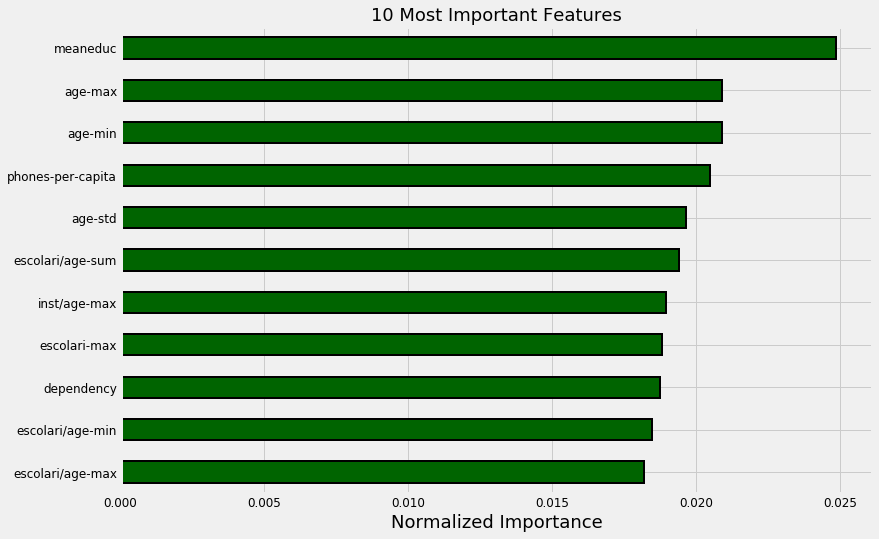

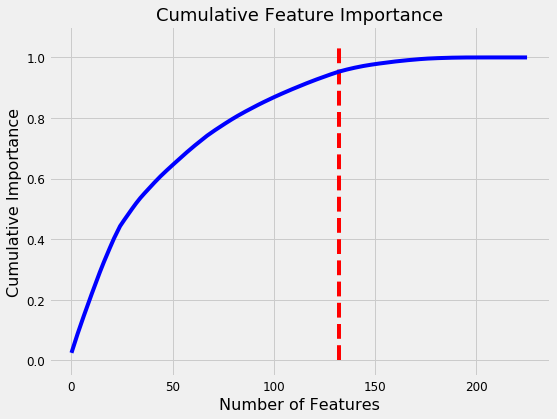

132 features required for 95% of cumulative importance.


In [225]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

중요도의 90 %를 설명하기 위해 ~ 180 개 기능 중 106 개만 필요하다는 것은 흥미 롭습니다.   
이는 일부 기능을 제거 할 수 있음을 알려줍니다. 그러나 기능 중요도는 기능의 어느 방향이 중요한지 알려주지 않습니다...   
(예를 들어, 교육이 더 많거나 적은 교육이 더 심각한 빈곤으로 이어지는 지 여부를 알려주는 데 사용할 수 없음)  
모델이 관련성이 있다고 간주하는 기능 만 알려줍니다.

In [226]:
def kde_target(df, variable):
    """Plots the distribution of `variable` in `df` colored by the `Target` column"""
    
    colors = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}

    plt.figure(figsize = (12, 8))
    
    df = df[df['Target'].notnull()]
    
    for level in df['Target'].unique():
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), 
                    label = f'Poverty Level: {level}', 
                    color = colors[int(subset['Target'].unique())])

    plt.xlabel(variable); plt.ylabel('Density');
    plt.title('{} Distribution'.format(variable.capitalize()));

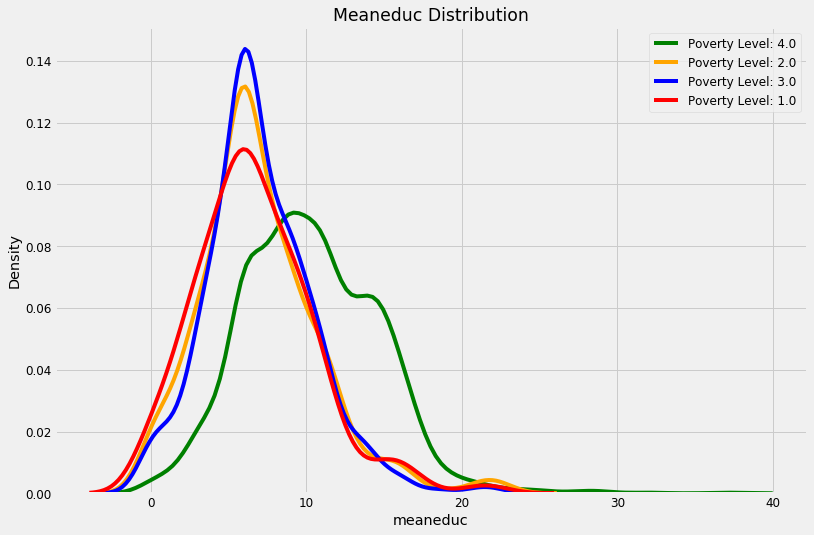

In [227]:
kde_target(final, 'meaneduc')

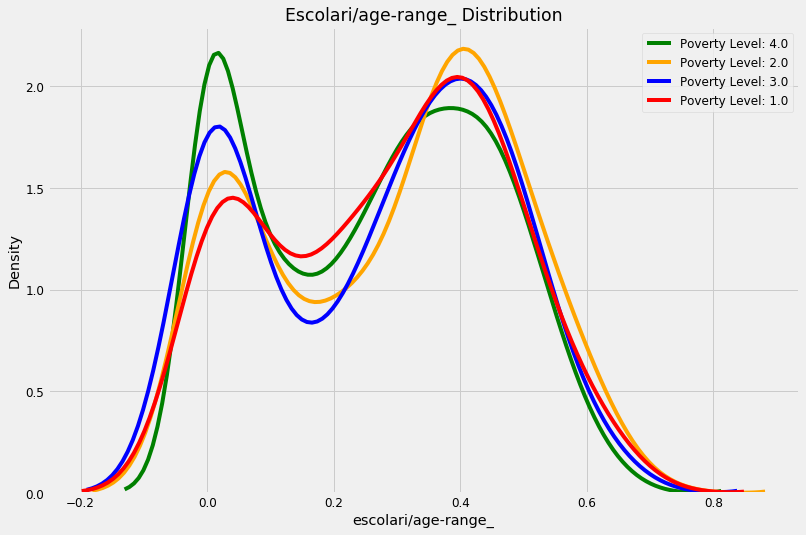

In [228]:
kde_target(final, 'escolari/age-range_')

# Model Selection

 우리는 이미 0.35의 최상의 매크로 F1을 제공하는 Random Forest Classifier라는 하나의 기본 모델을 시도했습니다.   
 그러나 머신 러닝에서는 주어진 데이터 세트에 가장 적합한 모델을 미리 알 수있는 방법이 없습니다.   
 다음 플롯은 Gaussian Naive Bayes조차도 그래디언트 부스팅 머신을 능가하는 몇 가지 문제가 있음을 보여줍니다.
 
! [ 클릭 ](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/algorithm_comparison.png)



  
이 플롯이 우리에게 알려주는 것은 **어떤 것이 최적인지 확인하기 위해 다양한 모델을 시도해야한다는 것**입니다.   
대부분의 사람들은 결국 그래디언트 부스팅 머신에 정착하고 우리는 그것을 시도 할 것입니다.   
그러나 지금은 다른 옵션 중 일부를 살펴 보겠습니다.   
Scikit-Learn 문서를 보면 말 그대로 수십 (아마도 수백 개)의 다중 클래스 기계 학습 모델이 있습니다.   
모두 시도 할 필요는 없지만 옵션에서 샘플링해야합니다.

우리가 원하는 것은 모델을 평가할 수있는 함수를 작성하는 것입니다.   
이미 대부분의 코드를 작성했기 때문에 이것은 매우 간단합니다.   
Random Forest Classifier 외에도 8 개의 다른 Scikit-Learn 모델을 사용해 보겠습니다.   
운 좋게도이 데이터 세트는 상대적으로 작고 모델을 빠르게 반복 할 수 있습니다.   
결과를 저장할 데이터 프레임을 만들고 함수는 각 모델의 데이터 프레임에 행을 추가합니다.

In [229]:
# Model 종류!!
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [230]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [231]:
# svm 결과
model_results = cv_model(train_set, train_labels, LinearSVC(), 'LSVC', model_results)


#이는 목록에서 제외되는 하나의 모델입니다 (초 매개 변수 조정을 수행하지 않았으므로 실제 성능이 향상 될 수 있음).

10 Fold CV Score: 0.28552 with std: 0.03985


In [232]:
# naive-bayes 결과
model_results = cv_model(train_set, train_labels, GaussianNB(), 'GNB', model_results)


# 그 성능은 매우 나쁩니다. 
# Gaussian Naive Bayes 방법을 재검토 할 필요는 없다고 생각합니다 (그래디언트 부스팅 머신보다 성능이 뛰어난 문제가 있지만).

10 Fold CV Score: 0.18451 with std: 0.03657


In [233]:
# 심층 신경망 - MLPClassifier 결과
model_results = cv_model(train_set, train_labels, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.29697 with std: 0.06336


다층 퍼셉트론 (심층 신경망)은 성능이 좋습니다.   
네트워크를 하이퍼 파라미터로 조정할 수있는 경우 옵션이 될 수 있습니다.   
그러나 이러한 제한된 양의 데이터는   
일반적으로 효과적으로 학습하기 위해 수십만 개의 예제가 필요하기 때문에 신경망에서 문제가 될 수 있습니다.

In [234]:
# LinearDiscriminantAnalysis(선형 판별 분석) 결과
model_results = cv_model(train_set, train_labels, LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.31792 with std: 0.06199


`UserWarnings`를 필터링하지 않고   
**LinearDiscriminantAnalysis**를 실행하면 "변수가 공선적입니다.("Variables are collinear.")"라는 메시지가 많이 표시됩니다.   
이것은 우리가 일부 공선적 특징을 제거하고 싶다는 힌트를 줄 수 있습니다!   
점수가 랜덤 포레스트와 비슷하기 때문에 공선 변수를 제거한 후이 모델을 다시 시도 할 수 있습니다.

In [235]:
# 릿지 분류 결과
model_results = cv_model(train_set, train_labels, RidgeClassifierCV(), 'RIDGE', model_results)
# 선형 모델 (리지 정규화 포함)은 놀랍도록 잘 수행됩니다. 
# 이것은 단순한 모델이이 문제에서 먼 길을 갈 수 있음을 나타낼 수 있습니다 (우리는 아마도 더 강력한 방법을 사용하게 될 것입니다).

10 Fold CV Score: 0.27803 with std: 0.0342


In [236]:
# KNN 결과
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.34765 with std: 0.03354

KNN with 10 neighbors

10 Fold CV Score: 0.31992 with std: 0.03213

KNN with 20 neighbors

10 Fold CV Score: 0.30723 with std: 0.04762


또 하나의 시도로, 의사 결정 트리의 앙상블을 사용하는 랜덤 포레스트의 변형 인**ExtraTreesClassifier**도 고려할 것입니다.

In [237]:
# ExtraTreesClassifier (랜덤 포레스트의 변형 모델) 결과
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, 
                         ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                         'EXT', model_results)

10 Fold CV Score: 0.32681 with std: 0.05096


## Comparing Model Performance

In [238]:
model_results = cv_model(train_set, train_labels,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.34394 with std: 0.04381


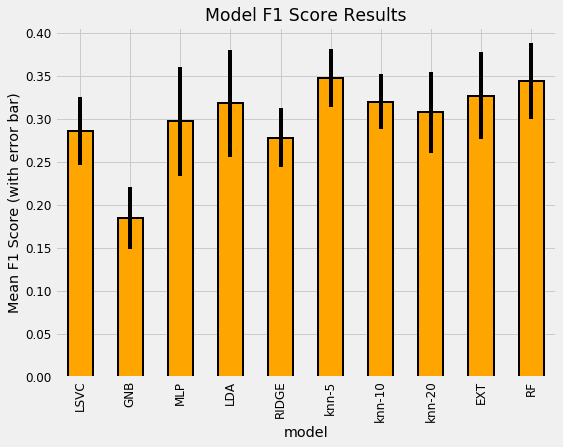

In [239]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

가장 가능성이 높은 후보는 즉시 가장 잘 수행되는 Random Forest 인 것 같습니다.   
하이퍼 파라미터를 조정하지 않았기 때문에 모델 간의 비교가 완벽하지 않지만 이러한 결과는 트리 기반 앙상블 방법 (Gradient Boosting Machine 포함)이 구조화 된 데이터 세트에서 매우 잘 수행된다는 것을 발견 한 다른 많은 Kaggle 경쟁자들의 결과를 반영합니다.   
  
**하이퍼 파라미터 성능은 기계 학습 모델의 성능을 향상 시키지만 모든 모델에 대해 가능한 모든 설정 조합을 시도 할 시간이 없습니다.** 
  
아래 그래프 (Randal Olson의 논문에서 발췌)는 Scikit-Learn의 기본값에 대한 하이퍼 파라미터 튜닝의 효과를 보여줍니다.
![하이퍼파라미터 튜닝효과](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/hyperparameter_improvement.png)


대부분의 경우 정확도 이득은 10 % 미만이므로 최악의 모델이 튜닝을 통해 갑자기 최상의 모델이되지는 않을 것입니다.

지금은 랜덤 포레스트가 최선이라고 말할 것입니다.   
나중에 Scikit-Learn에서 구현되지는 않았지만 Gradient Boosting Machine을 사용하는 방법을 살펴 보겠습니다. 대신 더 강력한 LightGBM 버전을 사용할 것입니다. 이제 Random Forest를 사용하여 제출을 시작하겠습니다.

# Making a Submission
제출하려면 테스트 데이터가 필요합니다.   
다행히도 우리는 기차 데이터와 똑같은 방식으로 포맷 된 테스트 데이터를 가지고 있습니다.
  
  
  테스트 제출 형식은 다음과 같습니다. 
  각 가구에 대한 예측을하고 있지만 실제로는 개인당 한 행 (ID로 식별 됨)이 필요하지만 가장에 대한 예측 만 점수가 매겨집니다.
    
  Id,Target  
ID_2f6873615,1  
ID_1c78846d2,2  
ID_e5442cf6a,3  
ID_a8db26a79,4  
ID_a62966799,4    

---
`submission_base`에는 각 개인에 대한 "예측"이 있어야하므로 테스트 세트의 모든 개인이 포함되지만,,, 
`test_ids`에는 `가장의 idhogar` 만 포함됩니다.   
**예측할 때 각 가구에 대해서만 예측 한 다음 예측 데이터 프레임을 가구 ID (idhogar)의 모든 개인과 병합합니다.**   
이렇게하면 가정의 모든 사람에 대해 동일한 값으로 대상이 설정됩니다.   
세대주가없는 테스트 가구의 경우 점수가 매겨지지 않으므로 이러한 예측을 4로 설정할 수 있습니다.


In [240]:
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

The function below takes in a model, a training set, the training labels, and a testing set and performs the following operations:

- Trains the model on the training data using fit
- Makes predictions on the test data using predict
- Creates a submission dataframe that can be saved and uploaded to the competitio

In [241]:
def submit(model, train, train_labels, test, test_ids):
    """Train and test a model on the dataset"""
    
    # Train on the data
    model.fit(train, train_labels)
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar': test_ids,
                               'Target': predictions})

     # Make a submission dataframe
    submission = submission_base.merge(predictions, 
                                       on = 'idhogar',
                                       how = 'left').drop(columns = ['idhogar'])
    
    # Fill in households missing a head
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)

    return submission 

In [242]:
rf_submission = submit(RandomForestClassifier(n_estimators = 100, 
                                              random_state=10, n_jobs = -1), 
                         train_set, train_labels, test_set, test_ids)

rf_submission.to_csv('rf_submission.csv', index = False)
# 대략 0.370

# Feature Selection

 
모델 성능을 향상시킬 수있는 한 가지 방법은 **Feature Selection**입니다.   
이것은 모델에 가장 유용한 기능 만 유지하려고하는 프로세스입니다.   
"가장 유용하다"는 것은 여러 가지를 의미 할 수 있으며 가장 중요한 기능을 선택하기위한 수많은 휴리스틱이 있습니다.   
이 노트북의 기능 선택을 위해 먼저 상관 관계가 0.95보다 큰 모든 열을 제거한 다음 (이미 기능 엔지니어링 중에 일부 작업을 수행했습니다) 

Scikit-Learn 라이브러리를 사용하여 재귀 기능 제거(recursive feature elimination)를 적용합니다.

1) 상관 관계입니다.   
0.95는 임의의 임계 값입니다. 값을 자유롭게 변경하고 성능이 어떻게 변경되는지 확인하십시오!

In [243]:
train_set = pd.DataFrame(train_set, columns = features)

# 상관 행렬 생성
corr_matrix = train_set.corr()

# 상관 행렬의 위 삼각형 지정
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 상관계수 값이 0.95 보다 큰 칼럼의 인덱스 반환
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'elec', 'v18q-count', 'female-sum']

In [244]:
train_set = train_set.drop(columns = to_drop)
train_set.shape

(2973, 222)

In [245]:
test_set = pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = 'inner')
features = list(train_set.columns)

## Recursive Feature Elimination with Random Forest(랜덤 포레스트를 사용한 재귀 기능 제거)  
 
 
Sklearn의 `RFECV`는 **교차 검증을 통한 재귀적 기능 제거**를 나타냅니다.   
선택기는 반복적 인 방식으로 기능 중요도가있는 모델을 사용하여 작동합니다.   
반복 할 때마다 기능의 일부 또는 설정된 수의 기능을 제거합니다.   
교차 검증 점수가 더 이상 향상되지 않을 때까지 반복이 계속됩니다.

선택기 객체를 생성하기 위해 모델, 각 반복에서 제거 할 기능 수, 교차 유효성 검사 접기, 사용자 지정 채점자 및 선택을 안내하는 기타 매개 변수를 전달합니다.

In [246]:
from sklearn.feature_selection import RFECV

# 모델 생성
estimator = RandomForestClassifier(random_state = 10, n_estimators = 100,  n_jobs = -1)

# 기능 제거 위한 객체 생성
selector = RFECV(estimator, step = 1, cv = 3, scoring= scorer, n_jobs = -1)

그런 다음 다른 sklearn 모델과 마찬가지로 학습 데이터에 선택기를 `fit`한다.   
교차 검증 점수가 더 이상 향상되지 않을 때까지 기능 선택이 계속됩니다.

In [247]:
selector.fit(train_set, train_labels)

RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=10,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=-1,
      scoring=make_scorer(f1_score, average=macro), step=1, verbose=0)

객체를 조사하여 각 반복에 대한 학습 점수를 볼 수 있습니다.   
다음 코드는 학습을위한 기능 수에 대한 유효성 검사 점수를 표시합니다.

169

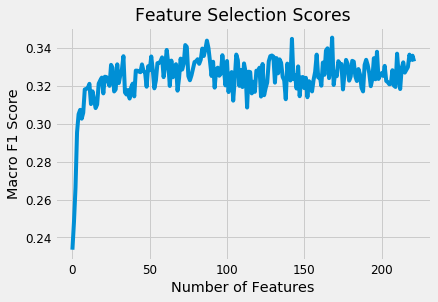

In [248]:
plt.plot(selector.grid_scores_);

plt.xlabel('Number of Features'); plt.ylabel('Macro F1 Score'); plt.title('Feature Selection Scores');
selector.n_features_


96 개까지 기능을 추가하면 점수가 향상되는 것을 확인할 수 있습니다.   
선택기에 따르면 이것은 최적의 기능 수입니다.
  
각 기능의 순위는 훈련 된 개체를 검사하여 찾을 수 있습니다.   
이것은 본질적으로 반복을 통해 평균화 된 기능의 중요성을 나타냅니다.   
기능은 동일한 순위를 공유 할 수 있으며 순위가 1 인 기능 만 유지됩니다.

In [249]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

feature  rank
110     female-range_     1
124  estadocivil5-sum     1
125  estadocivil6-min     1
126  estadocivil6-max     1
127  estadocivil7-min     1
128  estadocivil7-max     1
129  estadocivil7-sum     1
130  estadocivil7-std     1
133   parentesco1-std     1
135   parentesco2-max     1

마지막으로 기능을 선택한 다음 교차 검증에서 평가합니다.

In [250]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

# ranking=1 인 피처만 저장
selected_features = train_set.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10 Fold CV Score: 0.35016 with std: 0.04098


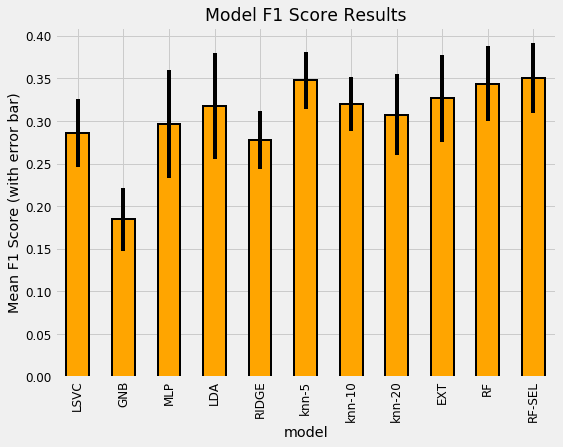

In [251]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

선택한 기능이있는 모델은 교차 검증에서 약간 더 좋습니다.   
다음 모델 인 Gradient Boosting Machine에서 사용할 수 있도록 두 기능 세트를 모두 유지할 수 있습니다

# Upgrading Our Model: Gradient Boosting Machine(GBM)

## Choosing Number of Estimators with Early Stopping
(조기 중지를 사용하여 추정기 수 선택)    

추정기 수 (n_estimators 또는 num_boost_rounds라고하는 앙상블의 의사 결정 트리 수)를 선택하기 위해 5 겹 교차 유효성 검증으로 조기 중지를 사용합니다. 이것은 매크로 F1 점수로 측정 된 성과가 100 번의 훈련 라운드 동안 증가하지 않을 때까지 추정치를 계속 추가합니다. 이 메트릭을 사용하려면 사용자 지정 메트릭을 정의해야합니다.

In [252]:
def macro_f1_score(labels, predictions):
    # Reshape the predictions as needed
    predictions = predictions.reshape(len(np.unique(labels)), -1 ).argmax(axis = 0)
    
    metric_value = f1_score(labels, predictions, average = 'macro')
    
    # Return is name, value, is_higher_better
    return 'macro_f1', metric_value, True

# Light Gradient Boosting Machine Implementation


아래 함수는 Stratified Kfold 교차 검증 및 조기 중지를 사용하여 그래디언트 부스팅 머신을 훈련하여 훈련 데이터에 대한 과적 합을 방지합니다 (여전히 발생할 수 있음). 이 함수는 교차 검증을 통해 훈련을 수행하고 각 Fold에 대한 확률로 예측을 기록합니다. 이것이 어떻게 작동하는지 확인하기 위해 각 접기에서 예측을 반환 한 다음 경쟁에 업로드 할 제출을 반환 할 것입니다.    

Gradient Boosting Machine에 대한 하이퍼 파라미터를 선택하는 것은 어려울 수 있으며 일반적으로 모델 최적화를 통해 수행됩니다. 이 노트북에서는 이전 문제에서 잘 작동하는 것으로 확인 된 하이퍼 파라미터 세트를 사용할 것입니다 (반드시이 경쟁으로 해석되지는 않음).

n_estimators를 10000으로 설정했지만, early_stopping_rounds에 대해 교차 검증 지표가 개선되지 않을 때 훈련 추정기를 종료하는 조기 중지를 사용하고 있기 때문에 실제로이 수치에 도달하지 않습니다. 이 기능에는 많은 일이 진행되고 있으며, 모든 기능이 있는지주의 깊게 읽어보십시오! 나는 주석과 코드를 간단하게 만들려고 노력했다. (디스플레이는 훈련 중에 %% capture와 함께 사용자 지정 정보를 표시하는 데 사용되므로 훈련 중에 모든 LightGBM 정보를 볼 필요가 없습니다).

In [253]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from IPython.display import display

def model_gbm(features, labels, test_features, test_ids, 
              nfolds = 5, return_preds = False, hyp = None):
    """Model using the GBM and cross validation.
       Trains with early stopping on each fold.
       Hyperparameters probably need to be tuned."""
    
    feature_names = list(features.columns)

    # Option for user specified hyperparameters
    if hyp is not None:
        # Using early stopping so do not need number of esimators
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
    
    else:
        # Model hyperparameters
        params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced'}
    
    # Build the model
    model = lgb.LGBMClassifier(**params, objective = 'multiclass', 
                               n_jobs = -1, n_estimators = 10000,
                               random_state = 10)
    
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # Hold all the predictions from each fold
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))
    
    # Convert to arrays for indexing
    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1 ))
    
    valid_scores = []
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Dataframe for fold predictions
        fold_predictions = pd.DataFrame()
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score,
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 200)
        
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        
        # Make predictions from the fold as probabilities
        fold_probabilitites = model.predict_proba(test_features)
        
        # Record each prediction for each class as a separate column
        for j in range(4):
            fold_predictions[(j + 1)] = fold_probabilitites[:, j]
            
        # Add needed information for predictions 
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)
        
        # Add the predictions as new rows to the existing predictions
        predictions = predictions.append(fold_predictions)
        
        # Feature importances
        importances += model.feature_importances_ / nfolds   
        
        # Display fold information
        display(f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    # Feature importances dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': importances})
    
    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')
    
    # If we want to examine predictions don't average over folds
    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
        return predictions, feature_importances
    
    # Average the predictions over folds
    predictions = predictions.groupby('idhogar', as_index = False).mean()
    
    # Find the class and associated probability
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    predictions = predictions.drop(columns = ['fold'])
    
    # Merge with the base to have one prediction for each individual
    submission = submission_base.merge(predictions[['idhogar', 'Target']], on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
        
    # Fill in the individuals that do not have a head of household with 4 since these will not be scored
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    # return the submission and feature importances along with validation scores
    return submission, feature_importances, valid_scores


In [254]:
%%capture --no-display
predictions, gbm_fi = model_gbm(train_set, train_labels, test_set, test_ids, return_preds=True)


'Fold 1, Validation Score: 0.38034, Estimators Trained: 0'

'Fold 2, Validation Score: 0.39838, Estimators Trained: 0'

'Fold 3, Validation Score: 0.42105, Estimators Trained: 0'

'Fold 4, Validation Score: 0.44083, Estimators Trained: 0'

'Fold 5, Validation Score: 0.39664, Estimators Trained: 0'

'5 cross validation score: 0.40745 with std: 0.02113.'

In [255]:
predictions.head()

1         2         3         4    idhogar  fold  Target  confidence
0  0.000445  0.000329  0.002106  0.997121  72958b30c     1       4    0.997121
1  0.048759  0.007122  0.003849  0.940270  5b598fbc9     1       4    0.940270
2  0.011080  0.013251  0.056149  0.919520  1e2fc704e     1       4    0.919520
3  0.000275  0.001345  0.000581  0.997799  8ee7365a8     1       4    0.997799
4  0.007221  0.004760  0.011339  0.976680  ff69a6fc8     1       4    0.976680

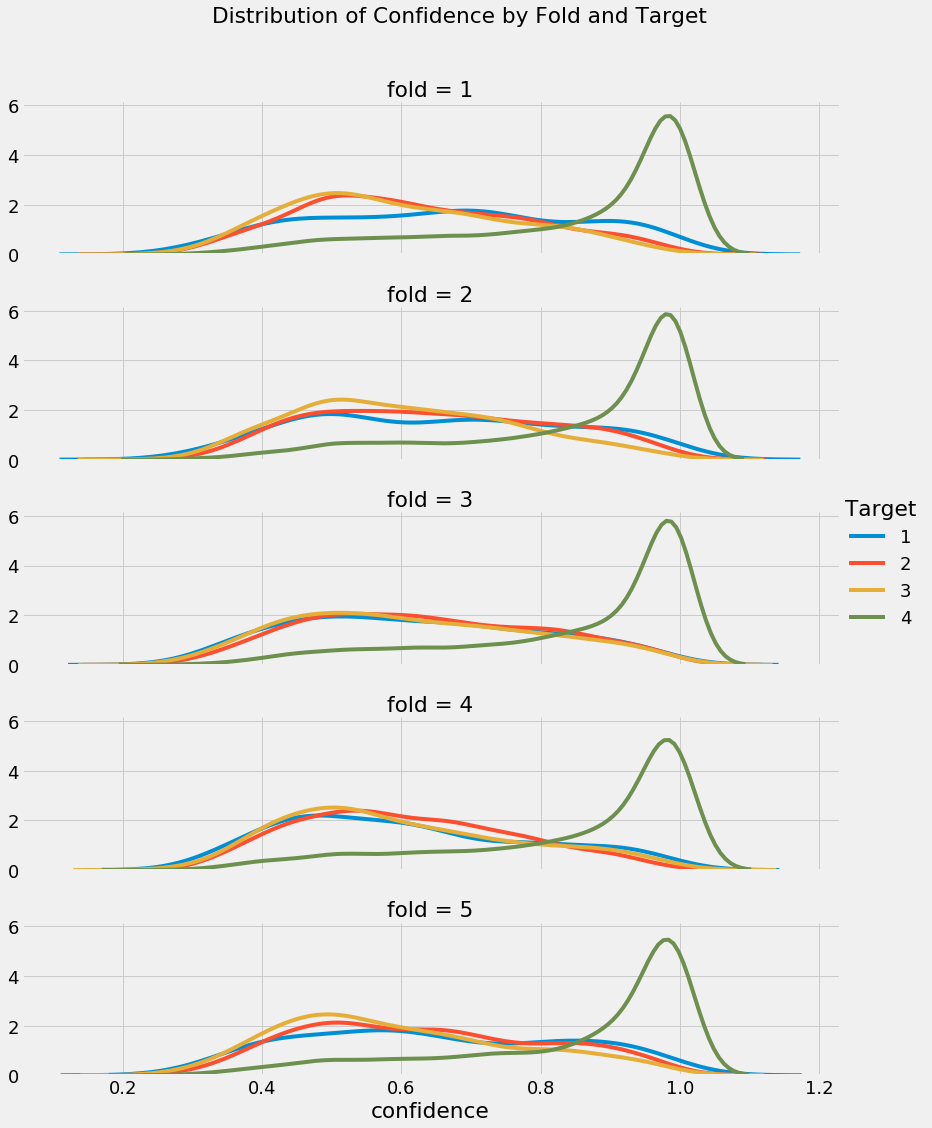

In [256]:
plt.rcParams['font.size'] = 18

# Kdeplot
g = sns.FacetGrid(predictions, row = 'fold', hue = 'Target', size = 3, aspect = 4)
g.map(sns.kdeplot, 'confidence');
g.add_legend();

plt.suptitle('Distribution of Confidence by Fold and Target', y = 1.05);

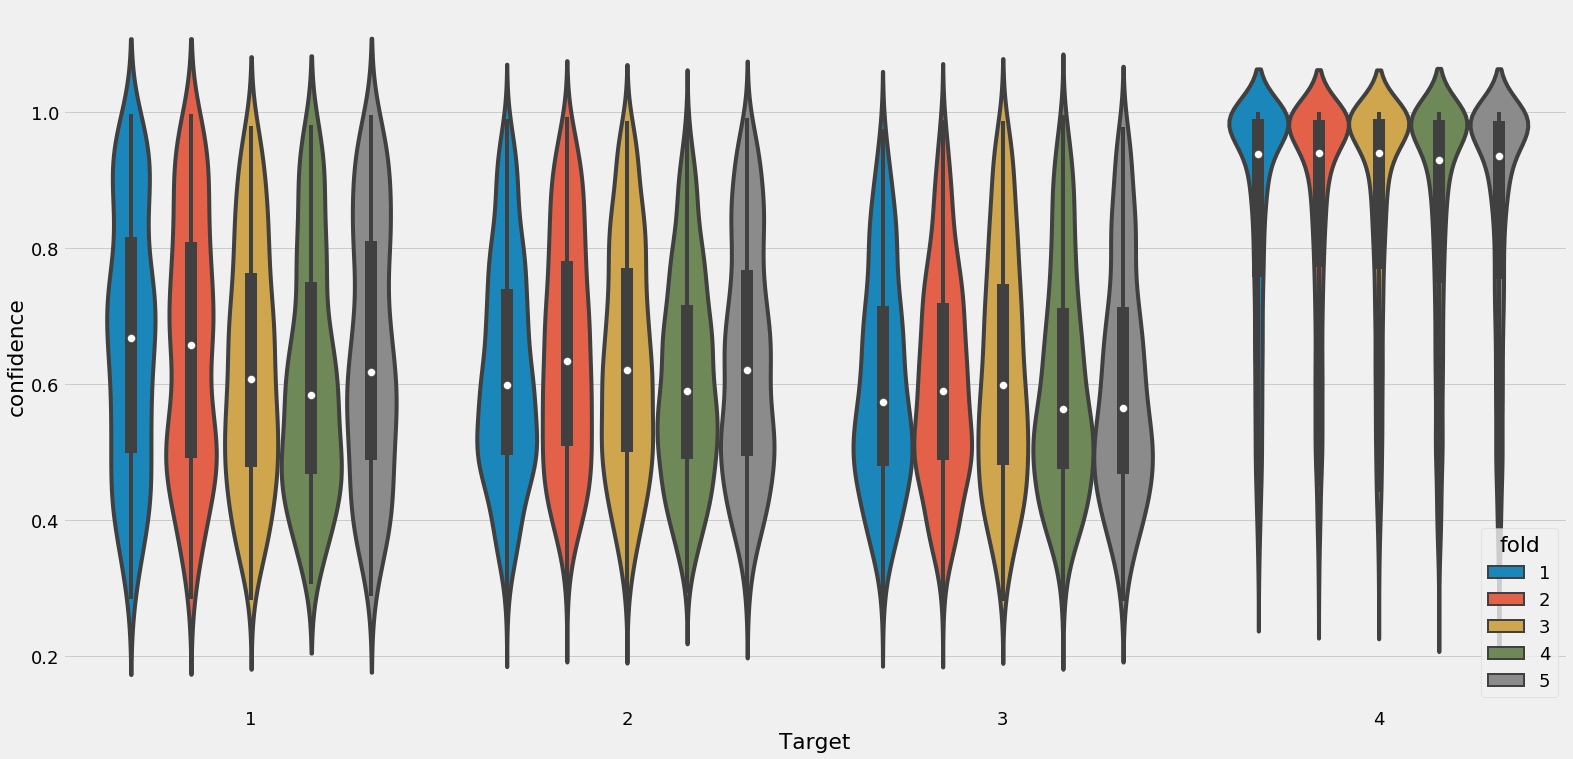

In [257]:
plt.figure(figsize = (24, 12))
sns.violinplot(x = 'Target', y = 'confidence', hue = 'fold', data = predictions);

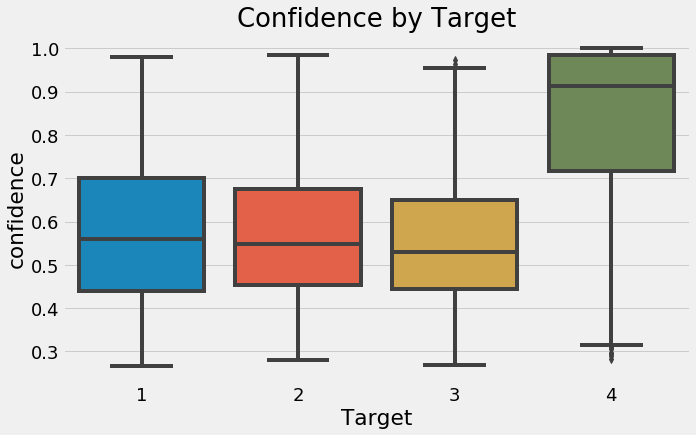

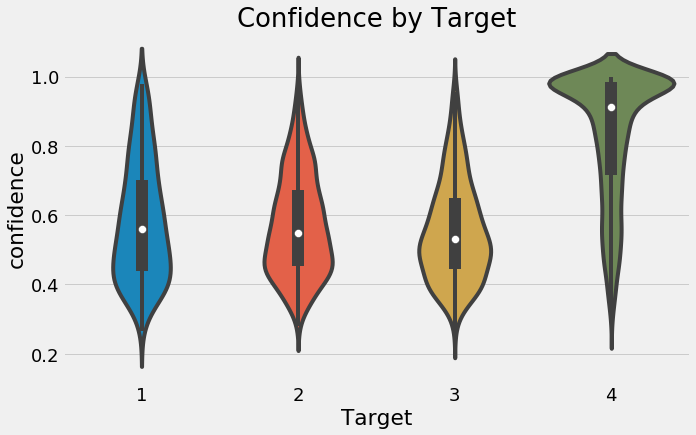

In [258]:
# Average the predictions over folds
predictions = predictions.groupby('idhogar', as_index = False).mean()

# Find the class and associated probability
predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
predictions = predictions.drop(columns = ['fold'])

# Plot the confidence by each target
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'confidence', data = predictions);
plt.title('Confidence by Target');

plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Target', y = 'confidence', data = predictions);
plt.title('Confidence by Target');

In [259]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, 
                                             test_set, test_ids, return_preds=False)

submission.to_csv('gbm_baseline.csv')

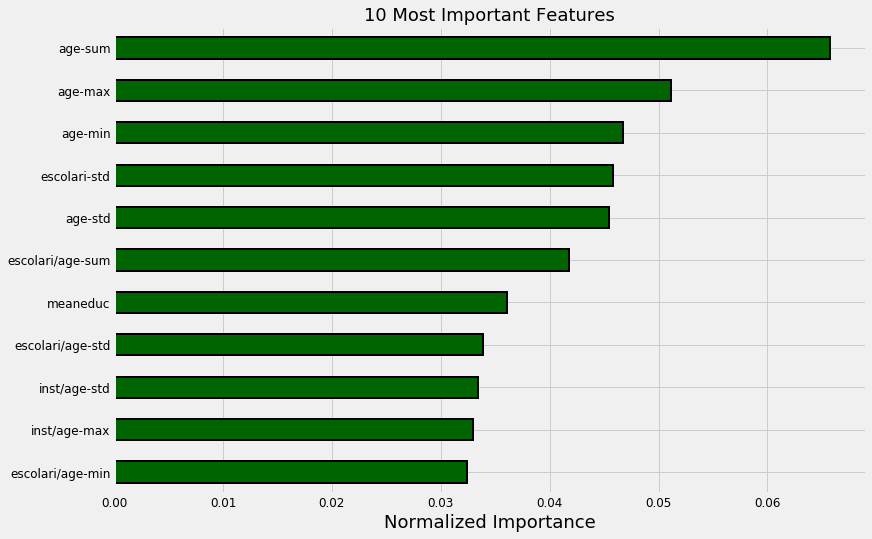

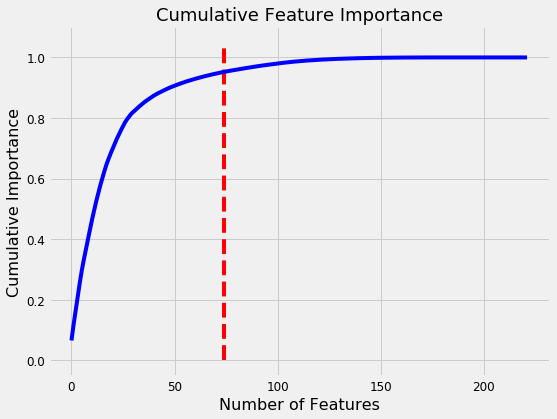

74 features required for 95% of cumulative importance.


In [260]:
_ = plot_feature_importances(gbm_fi, threshold=0.95)

In [ ]:
%%capture --no-display
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, 
                                                               test_selected, test_ids)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM", "GBM_SEL"], 
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std':  [valid_scores.std(), valid_scores_selected.std()]}),
                                                sort = True)

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids, 
                                             nfolds=10, return_preds=False)

In [ ]:
submission.to_csv('gbm_10fold.csv', index = False)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM_10Fold", "GBM_10Fold_SEL"], 
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std':  [valid_scores.std(), valid_scores_selected.std()]}),
                                    sort = True)

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6), 
                                  edgecolor = 'k', linewidth = 2,
                                  yerr = list(model_results['cv_std']))
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [ ]:
print(f"There are {gbm_fi_selected[gbm_fi_selected['importance'] == 0].shape[0]} features with no importance.")